# NYC TLC Passenger Analysis

## Data Preparation

In [1]:
# Ignore warnings
import warnings

warnings.simplefilter(action = "ignore", category = FutureWarning)

# import the necessary Python libraries Numpy, Pandas and Matplotlib with their usual shorthand notation.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
df = pd.read_csv('trips.csv')

In [3]:
df.head(10)

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,airport_fee,total_amount,pickup_location_id,dropoff_location_id,data_file_year,data_file_month
0,2,2022-03-23 08:51:18.000000 UTC,2022-03-23 08:59:11.000000 UTC,1.0,0.95,1.0,N,1,7.0,0.0,0.5,2.06,0.0,0.3,0.0,12.36,262,236,2022,3
1,2,2022-03-03 10:58:28.000000 UTC,2022-03-03 11:07:36.000000 UTC,1.0,0.85,1.0,N,1,7.0,0.0,0.5,2.06,0.0,0.3,0.0,12.36,237,236,2022,3
2,2,2022-03-07 08:35:06.000000 UTC,2022-03-07 08:43:20.000000 UTC,1.0,1.08,1.0,N,1,7.0,0.0,0.5,2.06,0.0,0.3,0.0,12.36,100,170,2022,3
3,2,2022-03-12 20:53:31.000000 UTC,2022-03-12 21:02:21.000000 UTC,1.0,0.93,1.0,N,1,7.0,0.5,0.5,2.16,0.0,0.3,0.0,12.96,100,170,2022,3
4,2,2022-03-09 00:05:43.000000 UTC,2022-03-09 00:11:49.000000 UTC,2.0,1.38,1.0,N,1,7.0,0.5,0.5,2.16,0.0,0.3,0.0,12.96,163,100,2022,3
5,2,2022-03-19 22:42:28.000000 UTC,2022-03-19 22:50:19.000000 UTC,1.0,0.99,1.0,N,1,7.0,0.5,0.5,0.00,0.0,0.3,0.0,10.80,151,238,2022,3
6,1,2022-03-28 15:13:15.000000 UTC,2022-03-28 15:20:29.000000 UTC,1.0,1.10,1.0,N,1,7.0,2.5,0.5,2.05,0.0,0.3,0.0,12.35,231,114,2022,3
7,2,2022-03-24 10:06:47.000000 UTC,2022-03-24 10:14:35.000000 UTC,1.0,1.14,1.0,N,1,7.0,0.0,0.5,3.09,0.0,0.3,0.0,13.39,263,236,2022,3
8,1,2022-03-01 17:06:41.000000 UTC,2022-03-01 17:15:24.000000 UTC,1.0,1.00,1.0,N,1,7.0,3.5,0.5,3.35,0.0,0.3,0.0,14.65,249,79,2022,3
9,1,2022-03-07 23:20:10.000000 UTC,2022-03-07 23:25:52.000000 UTC,1.0,1.70,1.0,Y,1,7.0,3.0,0.5,2.15,0.0,0.3,0.0,12.95,48,186,2022,3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54225 entries, 0 to 54224
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   vendor_id            54225 non-null  int64  
 1   pickup_datetime      54225 non-null  object 
 2   dropoff_datetime     54225 non-null  object 
 3   passenger_count      53015 non-null  float64
 4   trip_distance        54225 non-null  float64
 5   rate_code            53015 non-null  float64
 6   store_and_fwd_flag   53015 non-null  object 
 7   payment_type         54225 non-null  int64  
 8   fare_amount          54225 non-null  float64
 9   extra                54225 non-null  float64
 10  mta_tax              54225 non-null  float64
 11  tip_amount           54225 non-null  float64
 12  tolls_amount         54225 non-null  float64
 13  imp_surcharge        54225 non-null  float64
 14  airport_fee          53015 non-null  float64
 15  total_amount         54225 non-null 

## Data Cleansing

In [5]:
# Data Null Chcek
df.isnull().sum()

vendor_id                 0
pickup_datetime           0
dropoff_datetime          0
passenger_count        1210
trip_distance             0
rate_code              1210
store_and_fwd_flag     1210
payment_type              0
fare_amount               0
extra                     0
mta_tax                   0
tip_amount                0
tolls_amount              0
imp_surcharge             0
airport_fee            1210
total_amount              0
pickup_location_id        0
dropoff_location_id       0
data_file_year            0
data_file_month           0
dtype: int64

In [6]:
# Data duplicate Chcek
df.duplicated().sum()

0

In [7]:
# Drop rows with null value
df = df.dropna()

In [8]:
df.isnull().sum()

vendor_id              0
pickup_datetime        0
dropoff_datetime       0
passenger_count        0
trip_distance          0
rate_code              0
store_and_fwd_flag     0
payment_type           0
fare_amount            0
extra                  0
mta_tax                0
tip_amount             0
tolls_amount           0
imp_surcharge          0
airport_fee            0
total_amount           0
pickup_location_id     0
dropoff_location_id    0
data_file_year         0
data_file_month        0
dtype: int64

## Statistical descriptive

In [9]:
# Numerical Feature Statistical descriptive analysis

num = df.select_dtypes(include=[np.number])
num.describe()

,vendor_id,passenger_count,trip_distance,rate_code,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,airport_fee,total_amount,pickup_location_id,dropoff_location_id,data_file_year,data_file_month
count,53015.000000,53015.000000,53015.000000,53015.000000,53015.000000,53015.000000,53015.000000,53015.000000,53015.000000,53015.000000,53015.000000,53015.000000,53015.000000,53015.000000,53015.000000,53015.0,53015.000000
mean,1.710101,1.405414,3.723131,1.533132,1.232444,15.265019,1.034856,0.487726,2.781936,0.588929,0.295643,0.108648,22.155580,164.522833,162.312591,2022.0,6.345770
std,0.453720,0.969714,4.713461,6.561481,0.473754,14.470967,1.262543,0.097330,4.576114,2.061789,0.050510,0.354484,18.403848,64.782594,70.209042,0.0,2.861251
min,1.000000,0.000000,0.000000,1.000000,1.000000,-385.000000,-4.500000,-0.500000,-2.060000,-34.050000,-0.300000,-1.250000,-420.600000,1.000000,1.000000,2022.0,1.000000
25%,1.000000,1.000000,1.150000,1.000000,1.000000,7.000000,0.000000,0.500000,0.050000,0.000000,0.300000,0.000000,12.350000,132.000000,113.000000,2022.0,4.000000
50%,2.000000,1.000000,1.980000,1.000000,1.000000,10.500000,0.500000,0.500000,2.150000,0.000000,0.300000,0.000000,16.000000,161.000000,162.000000,2022.0,7.000000
75%,2.000000,1.000000,3.730000,1.000000,1.000000,17.000000,2.500000,0.500000,3.360000,0.000000,0.300000,0.000000,23.300000,234.000000,234.000000,2022.0,9.000000
max,2.000000,8.000000,113.560000,99.000000,4.000000,300.000000,8.250000,2.780000,733.430000,41.250000,0.300000,1.250000,748.730000,265.000000,265.000000,2022.0,11.000000


In [10]:
# Show count dimension numercial feature

for i in num:
  print('-----'*10)
  print(i)
  print(df[i].value_counts())

--------------------------------------------------
vendor_id
2    37646
1    15369
Name: vendor_id, dtype: int64
--------------------------------------------------
passenger_count
1.0    39129
2.0     8107
3.0     2123
0.0     1027
4.0     1004
5.0      973
6.0      650
8.0        1
7.0        1
Name: passenger_count, dtype: int64
--------------------------------------------------
trip_distance
1.00     777
1.10     758
1.20     705
0.90     691
1.30     676
        ... 
21.68      1
19.55      1
19.97      1
16.29      1
14.91      1
Name: trip_distance, Length: 2286, dtype: int64
--------------------------------------------------
rate_code
1.0     49646
2.0      2408
5.0       497
99.0      238
3.0       136
4.0        89
6.0         1
Name: rate_code, dtype: int64
--------------------------------------------------
payment_type
1    41581
2    10876
4      331
3      227
Name: payment_type, dtype: int64
--------------------------------------------------
fare_amount
 6.5      4722
 9.

## Data Preprocessing

In [11]:
# Change value from numerical to categorical

df['vendor_id'] = df['vendor_id'].replace([1, 2], ['Creative Mobile Techonologies', 'VeriFone Inc.'])
df['payment_type'] = df['payment_type'].replace([1, 2, 3, 4], ['credit card', 'cash', 'no charge', 'dispute '])

In [12]:
# Change value and dtype of feature

df['passenger_count'] = df['passenger_count'].astype(int)

df['rate_code'] = df['rate_code'].astype(int)
df['rate_code'] = df['rate_code'].replace([1, 2, 3, 4, 5, 6], ['standard rate', 'JFK', 'newark', 'nassau/westchester', 'negotiatedfare', 'group ride'])

From the data documentation, there are only 1 to 6 rate codes.
But in the data there is a value of 99, because 6 / Group ride there is only 1 in our data we will make 99 a group ride

In [13]:
df['rate_code'] = df['rate_code'].replace([99], ['group ride'])

In [14]:
df.head(10)

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,airport_fee,total_amount,pickup_location_id,dropoff_location_id,data_file_year,data_file_month
0,VeriFone Inc.,2022-03-23 08:51:18.000000 UTC,2022-03-23 08:59:11.000000 UTC,1,0.95,standard rate,N,credit card,7.0,0.0,0.5,2.06,0.0,0.3,0.0,12.36,262,236,2022,3
1,VeriFone Inc.,2022-03-03 10:58:28.000000 UTC,2022-03-03 11:07:36.000000 UTC,1,0.85,standard rate,N,credit card,7.0,0.0,0.5,2.06,0.0,0.3,0.0,12.36,237,236,2022,3
2,VeriFone Inc.,2022-03-07 08:35:06.000000 UTC,2022-03-07 08:43:20.000000 UTC,1,1.08,standard rate,N,credit card,7.0,0.0,0.5,2.06,0.0,0.3,0.0,12.36,100,170,2022,3
3,VeriFone Inc.,2022-03-12 20:53:31.000000 UTC,2022-03-12 21:02:21.000000 UTC,1,0.93,standard rate,N,credit card,7.0,0.5,0.5,2.16,0.0,0.3,0.0,12.96,100,170,2022,3
4,VeriFone Inc.,2022-03-09 00:05:43.000000 UTC,2022-03-09 00:11:49.000000 UTC,2,1.38,standard rate,N,credit card,7.0,0.5,0.5,2.16,0.0,0.3,0.0,12.96,163,100,2022,3
5,VeriFone Inc.,2022-03-19 22:42:28.000000 UTC,2022-03-19 22:50:19.000000 UTC,1,0.99,standard rate,N,credit card,7.0,0.5,0.5,0.00,0.0,0.3,0.0,10.80,151,238,2022,3
6,Creative Mobile Techonologies,2022-03-28 15:13:15.000000 UTC,2022-03-28 15:20:29.000000 UTC,1,1.10,standard rate,N,credit card,7.0,2.5,0.5,2.05,0.0,0.3,0.0,12.35,231,114,2022,3
7,VeriFone Inc.,2022-03-24 10:06:47.000000 UTC,2022-03-24 10:14:35.000000 UTC,1,1.14,standard rate,N,credit card,7.0,0.0,0.5,3.09,0.0,0.3,0.0,13.39,263,236,2022,3
8,Creative Mobile Techonologies,2022-03-01 17:06:41.000000 UTC,2022-03-01 17:15:24.000000 UTC,1,1.00,standard rate,N,credit card,7.0,3.5,0.5,3.35,0.0,0.3,0.0,14.65,249,79,2022,3
9,Creative Mobile Techonologies,2022-03-07 23:20:10.000000 UTC,2022-03-07 23:25:52.000000 UTC,1,1.70,standard rate,Y,credit card,7.0,3.0,0.5,2.15,0.0,0.3,0.0,12.95,48,186,2022,3


In [15]:
# categorical feature

cat = df.select_dtypes(exclude=[np.number])
cat.columns

Index(['vendor_id', 'pickup_datetime', 'dropoff_datetime', 'rate_code',
       'store_and_fwd_flag', 'payment_type'],
      dtype='object')

In [16]:
# Show count dimension categorical feature

for i in cat:
  print('-----'*10)
  print(i)
  print(df[i].value_counts())

--------------------------------------------------
vendor_id
VeriFone Inc.                    37646
Creative Mobile Techonologies    15369
Name: vendor_id, dtype: int64
--------------------------------------------------
pickup_datetime
2022-08-22 12:37:08.000000 UTC    2
2022-06-18 13:36:33.000000 UTC    2
2022-04-22 20:49:28.000000 UTC    2
2022-10-25 18:56:33.000000 UTC    2
2022-06-03 10:33:24.000000 UTC    2
                                 ..
2022-04-24 16:30:53.000000 UTC    1
2022-04-02 01:48:22.000000 UTC    1
2022-04-27 11:45:26.000000 UTC    1
2022-05-12 15:20:53.000000 UTC    1
2022-03-28 23:34:51.000000 UTC    1
Name: pickup_datetime, Length: 52941, dtype: int64
--------------------------------------------------
dropoff_datetime
2022-03-05 19:44:19.000000 UTC    2
2022-10-24 18:52:45.000000 UTC    2
2022-08-01 12:06:44.000000 UTC    2
2022-03-18 21:16:28.000000 UTC    2
2022-10-25 19:44:27.000000 UTC    2
                                 ..
2022-04-07 20:34:42.000000 UTC   

In [17]:
# numerical feature

num = df.select_dtypes(include=[np.number])
num.columns

Index(['passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'imp_surcharge', 'airport_fee',
       'total_amount', 'pickup_location_id', 'dropoff_location_id',
       'data_file_year', 'data_file_month'],
      dtype='object')

In [18]:
num = ['passenger_count', 'trip_distance',  'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'imp_surcharge', 'airport_fee',
       'total_amount', 'pickup_location_id', 'dropoff_location_id',
       'data_file_year', 'data_file_month']

### Numerical Feature Distribution

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


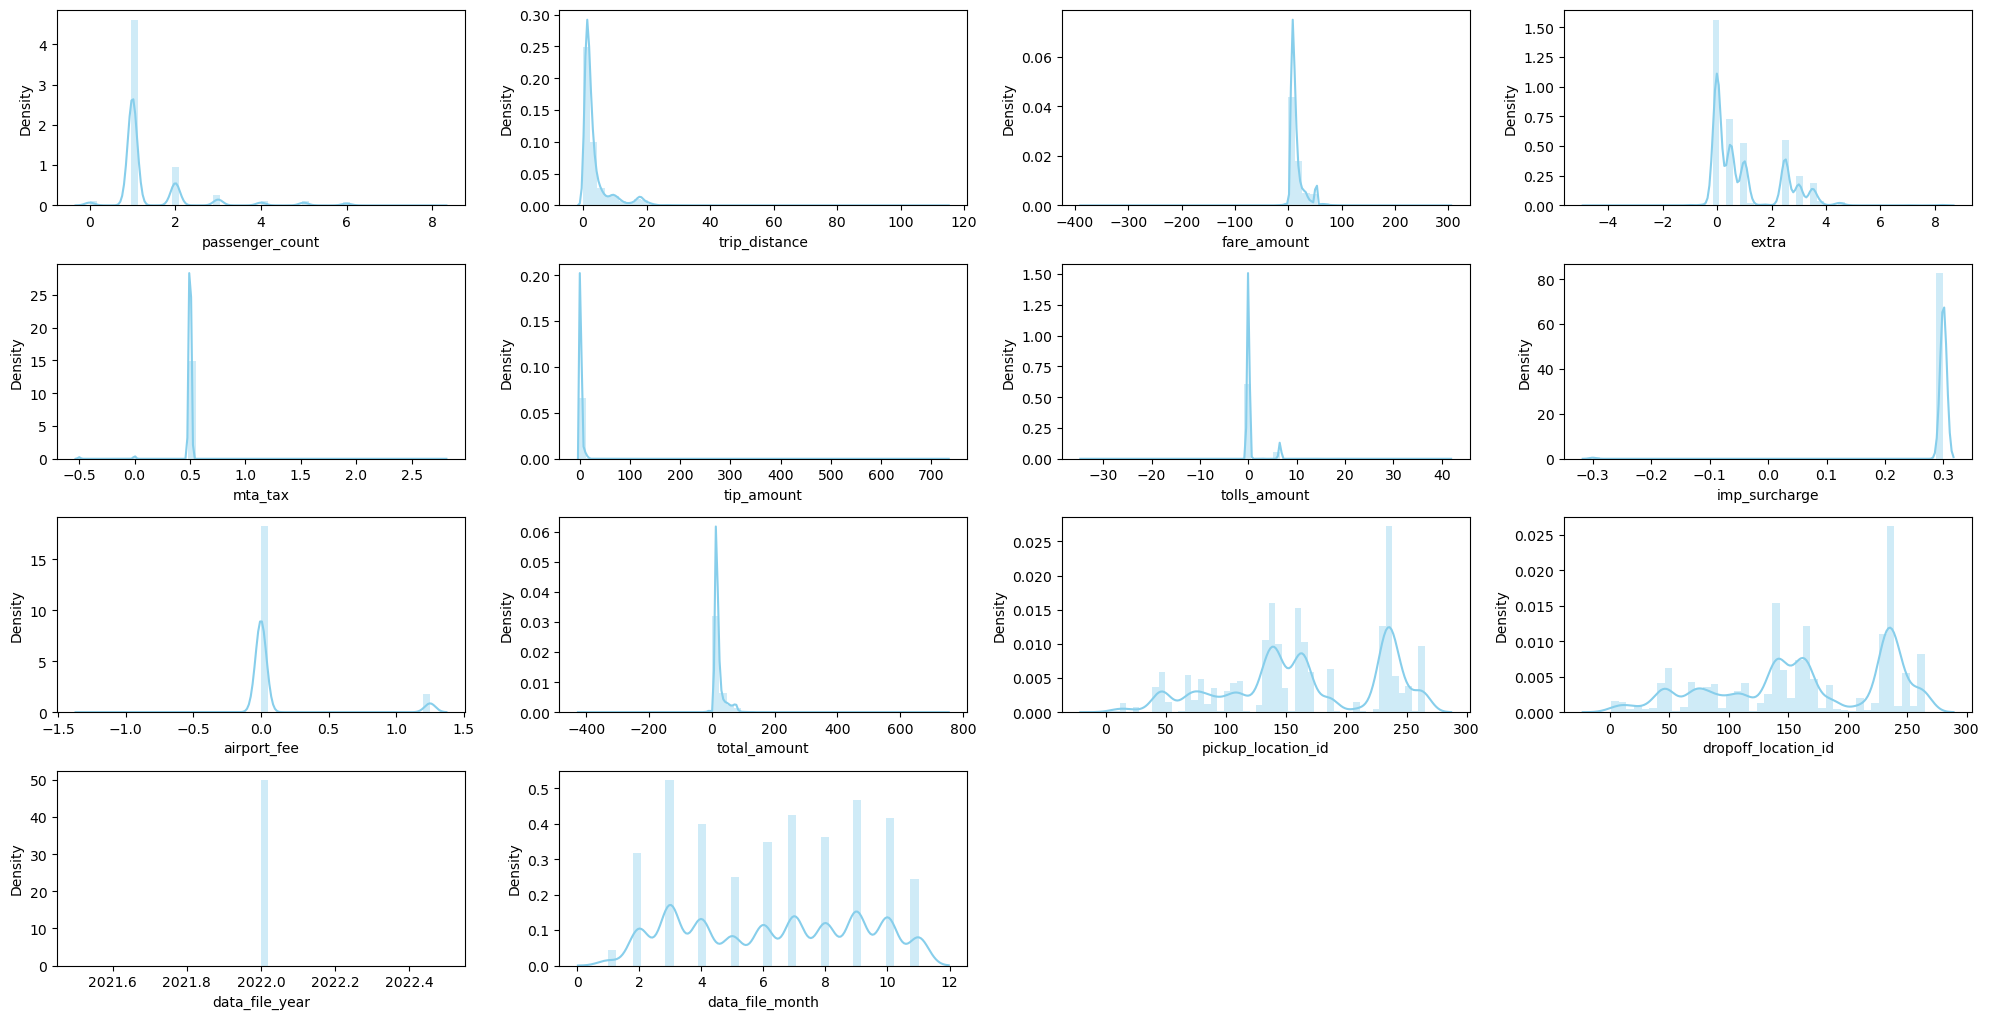

In [19]:
plt.figure(figsize=(20,20))
for i in range(0, len(num)):
    plt.subplot(8, 4, i+1)
    sns.distplot(x=df[num[i]], color='skyblue')
    plt.xlabel(num[i])
    plt.tight_layout()

### Numerical Feature Box Plot for outlier detection

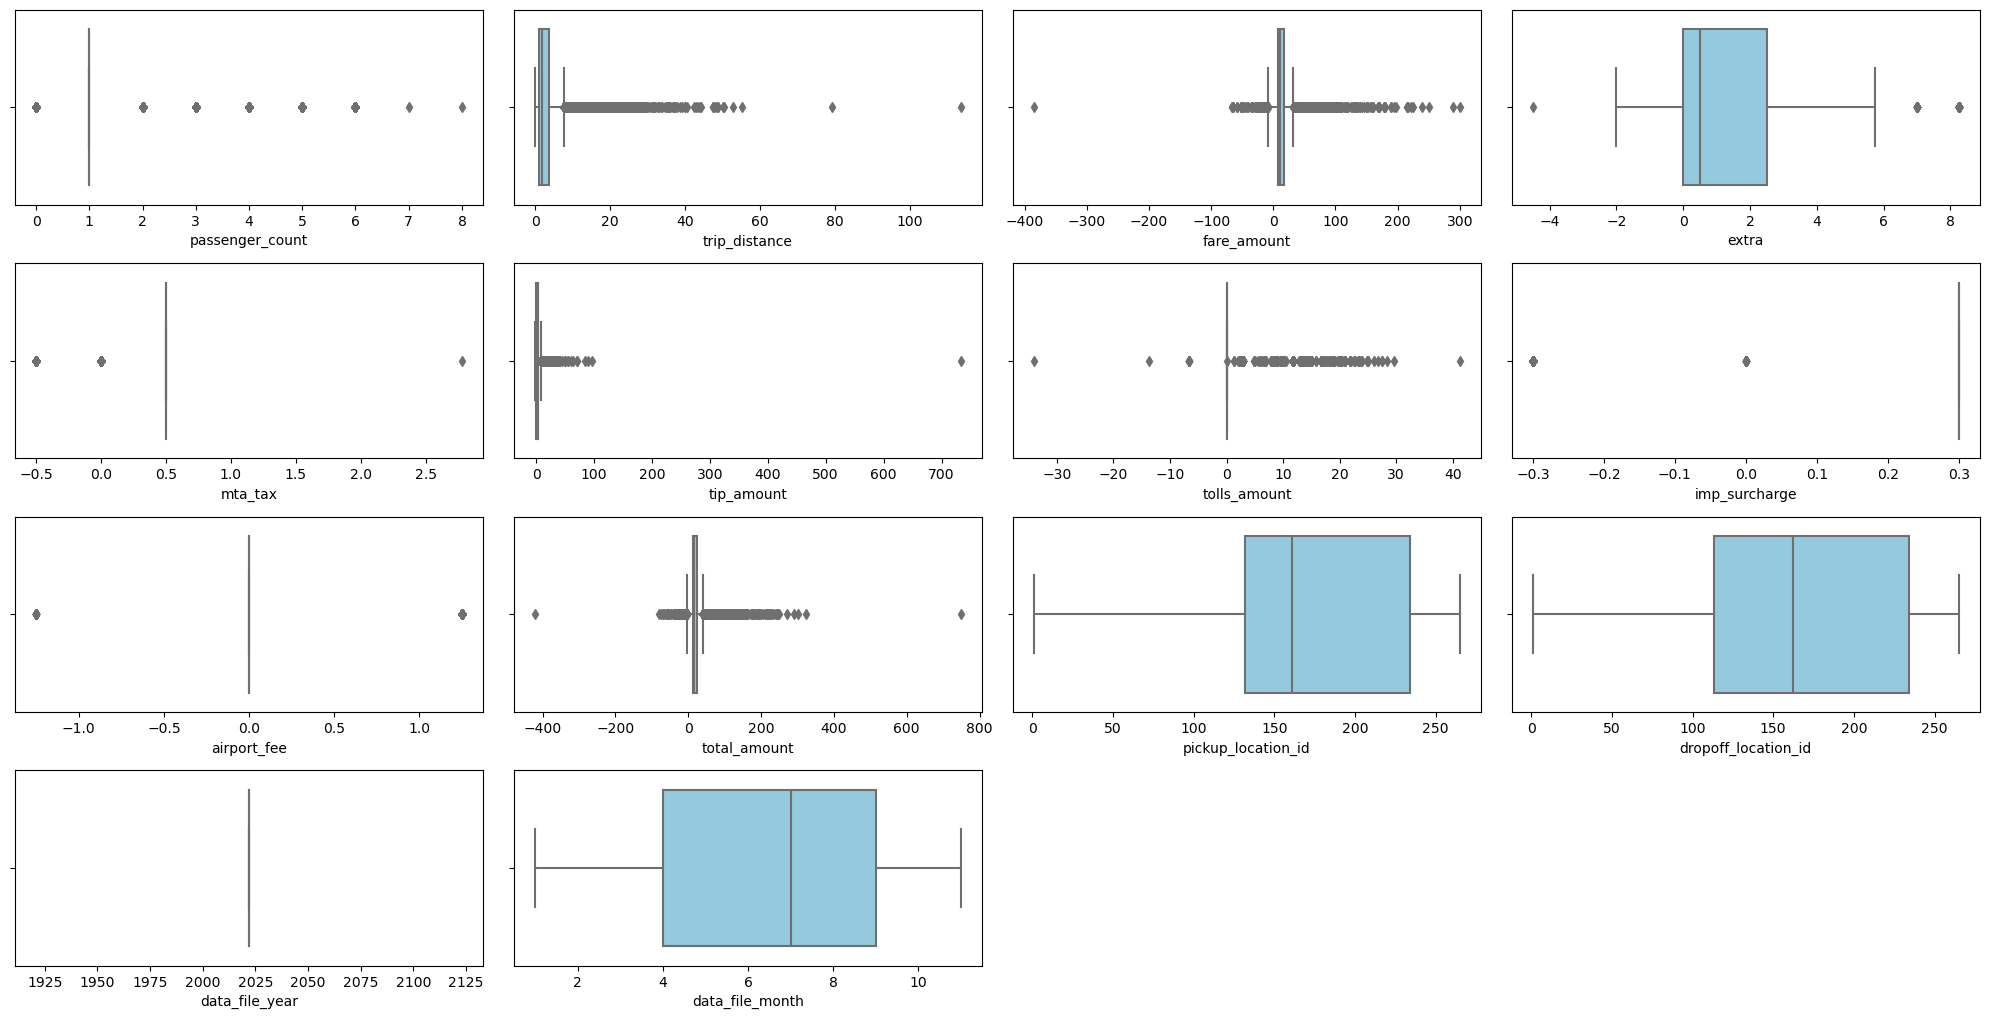

In [20]:
plt.figure(figsize=(20,20))
for i in range(0, len(num)):
    plt.subplot(8, 4, i+1)
    sns.boxplot(x=df[num[i]], color='skyblue')
    plt.xlabel(num[i])
    plt.tight_layout()

### Change negative value to positive value (absolute)

In [21]:
features = ['fare_amount', 'extra', 'mta_tax', 'tolls_amount',  'imp_surcharge','airport_fee','total_amount']

# Melakukan transformasi nilai negatif menjadi positif pada fitur-fitur yang dipilih
for feature in features:
    df[feature] = np.abs(df[feature])

In [22]:
for i in num:
  print('-----'*10)
  print(i)
  print(df[i].value_counts())

--------------------------------------------------
passenger_count
1    39129
2     8107
3     2123
0     1027
4     1004
5      973
6      650
8        1
7        1
Name: passenger_count, dtype: int64
--------------------------------------------------
trip_distance
1.00     777
1.10     758
1.20     705
0.90     691
1.30     676
        ... 
21.68      1
19.55      1
19.97      1
16.29      1
14.91      1
Name: trip_distance, Length: 2286, dtype: int64
--------------------------------------------------
fare_amount
6.50      4726
9.00      3714
5.50      3028
8.00      2771
9.50      2753
          ... 
24.24        1
125.00       1
73.20        1
19.30        1
288.50       1
Name: fare_amount, Length: 321, dtype: int64
--------------------------------------------------
extra
0.00    21128
0.50     9893
2.50     7449
1.00     7118
3.00     3354
3.50     2561
3.75      463
4.50      377
1.25      254
1.75      137
2.25       74
8.25       70
4.25       61
4.75       41
7.00       27
3.

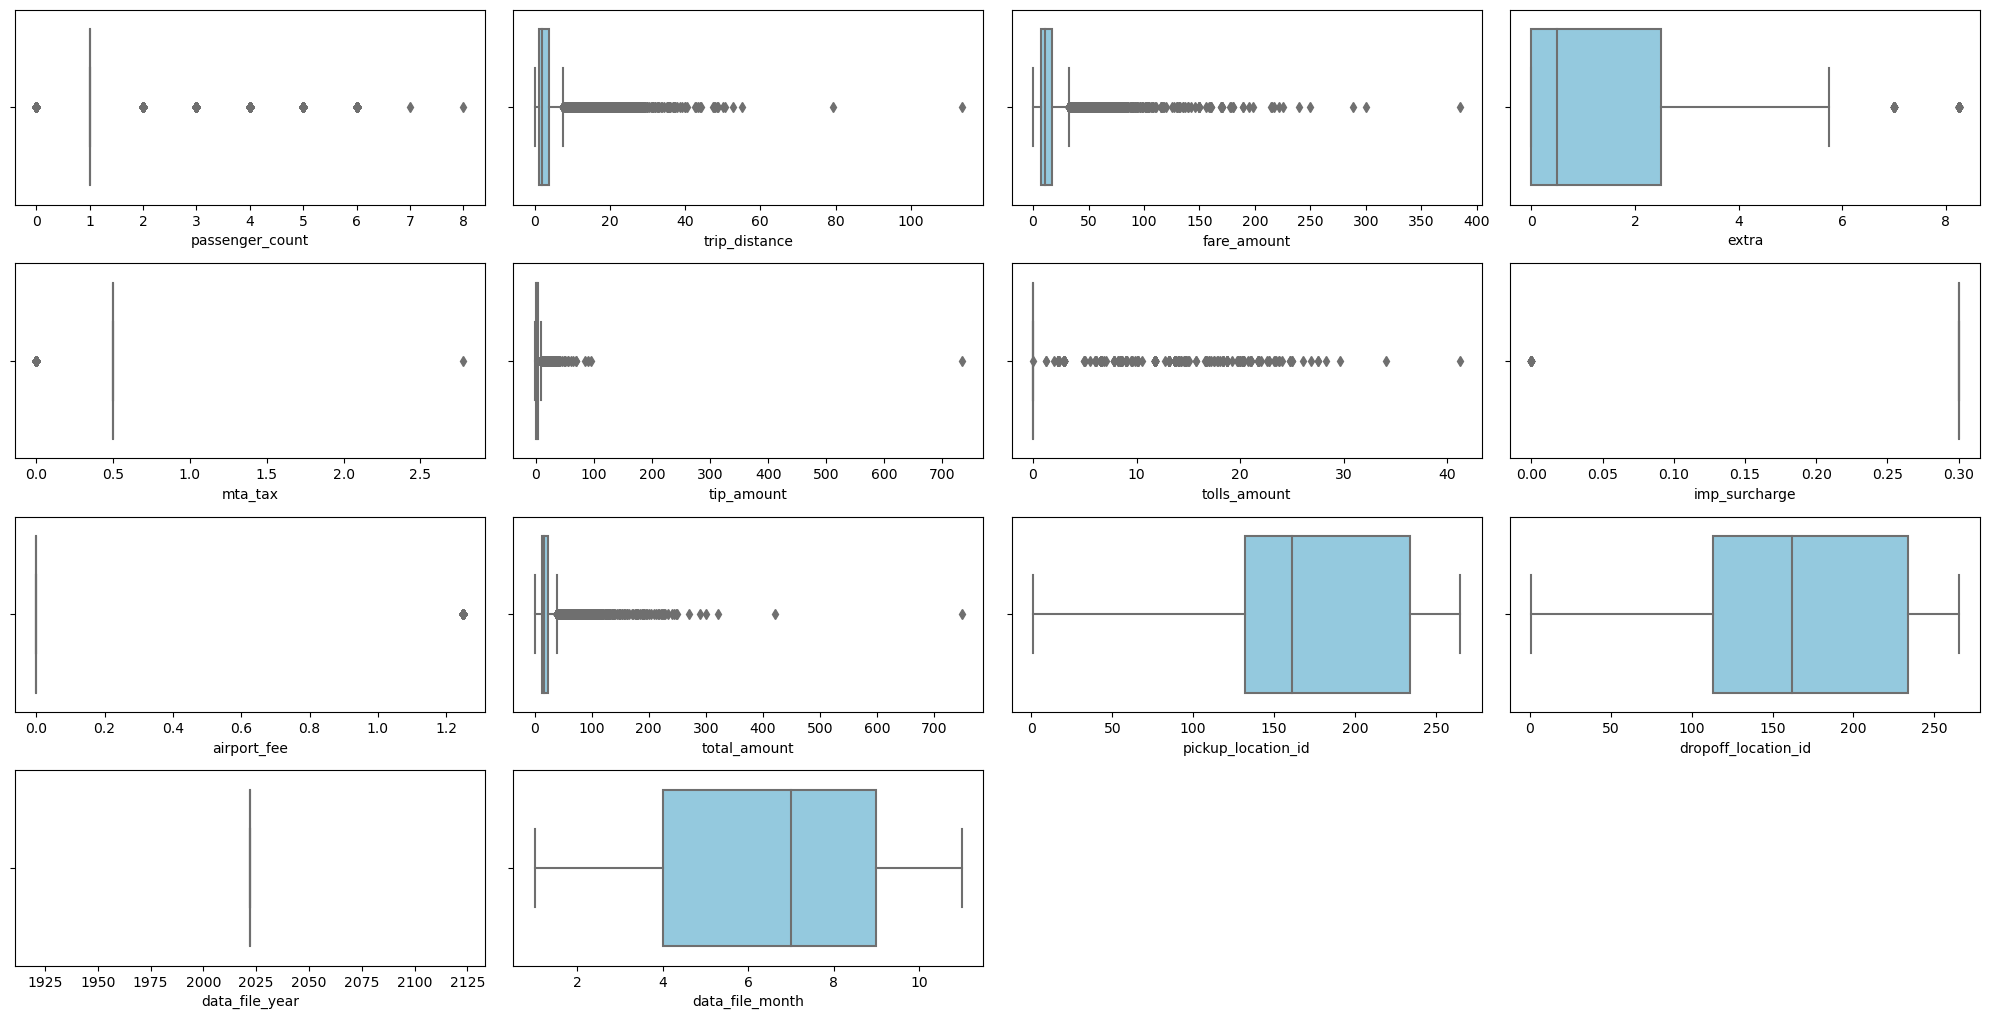

In [23]:
plt.figure(figsize=(20,20))
for i in range(0, len(num)):
    plt.subplot(8, 4, i+1)
    sns.boxplot(x=df[num[i]], color='skyblue')
    plt.xlabel(num[i])
    plt.tight_layout()

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53015 entries, 0 to 54224
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   vendor_id            53015 non-null  object 
 1   pickup_datetime      53015 non-null  object 
 2   dropoff_datetime     53015 non-null  object 
 3   passenger_count      53015 non-null  int32  
 4   trip_distance        53015 non-null  float64
 5   rate_code            53015 non-null  object 
 6   store_and_fwd_flag   53015 non-null  object 
 7   payment_type         53015 non-null  object 
 8   fare_amount          53015 non-null  float64
 9   extra                53015 non-null  float64
 10  mta_tax              53015 non-null  float64
 11  tip_amount           53015 non-null  float64
 12  tolls_amount         53015 non-null  float64
 13  imp_surcharge        53015 non-null  float64
 14  airport_fee          53015 non-null  float64
 15  total_amount         53015 non-null 

### Convert and format pickup_datetime and dropoff_datetime columns

In [25]:
# Convert and format pickup_datetime and dropoff_datetime columns
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime']).dt.strftime('%Y-%m-%d %H:%M:%S')
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime']).dt.strftime('%Y-%m-%d %H:%M:%S')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53015 entries, 0 to 54224
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   vendor_id            53015 non-null  object 
 1   pickup_datetime      53015 non-null  object 
 2   dropoff_datetime     53015 non-null  object 
 3   passenger_count      53015 non-null  int32  
 4   trip_distance        53015 non-null  float64
 5   rate_code            53015 non-null  object 
 6   store_and_fwd_flag   53015 non-null  object 
 7   payment_type         53015 non-null  object 
 8   fare_amount          53015 non-null  float64
 9   extra                53015 non-null  float64
 10  mta_tax              53015 non-null  float64
 11  tip_amount           53015 non-null  float64
 12  tolls_amount         53015 non-null  float64
 13  imp_surcharge        53015 non-null  float64
 14  airport_fee          53015 non-null  float64
 15  total_amount         53015 non-null 

In [27]:
# Convert strings back to datetime objects
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53015 entries, 0 to 54224
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   vendor_id            53015 non-null  object        
 1   pickup_datetime      53015 non-null  datetime64[ns]
 2   dropoff_datetime     53015 non-null  datetime64[ns]
 3   passenger_count      53015 non-null  int32         
 4   trip_distance        53015 non-null  float64       
 5   rate_code            53015 non-null  object        
 6   store_and_fwd_flag   53015 non-null  object        
 7   payment_type         53015 non-null  object        
 8   fare_amount          53015 non-null  float64       
 9   extra                53015 non-null  float64       
 10  mta_tax              53015 non-null  float64       
 11  tip_amount           53015 non-null  float64       
 12  tolls_amount         53015 non-null  float64       
 13  imp_surcharge        53015 non-

In [28]:
df.head(10)

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,airport_fee,total_amount,pickup_location_id,dropoff_location_id,data_file_year,data_file_month
0,VeriFone Inc.,2022-03-23 08:51:18,2022-03-23 08:59:11,1,0.95,standard rate,N,credit card,7.0,0.0,0.5,2.06,0.0,0.3,0.0,12.36,262,236,2022,3
1,VeriFone Inc.,2022-03-03 10:58:28,2022-03-03 11:07:36,1,0.85,standard rate,N,credit card,7.0,0.0,0.5,2.06,0.0,0.3,0.0,12.36,237,236,2022,3
2,VeriFone Inc.,2022-03-07 08:35:06,2022-03-07 08:43:20,1,1.08,standard rate,N,credit card,7.0,0.0,0.5,2.06,0.0,0.3,0.0,12.36,100,170,2022,3
3,VeriFone Inc.,2022-03-12 20:53:31,2022-03-12 21:02:21,1,0.93,standard rate,N,credit card,7.0,0.5,0.5,2.16,0.0,0.3,0.0,12.96,100,170,2022,3
4,VeriFone Inc.,2022-03-09 00:05:43,2022-03-09 00:11:49,2,1.38,standard rate,N,credit card,7.0,0.5,0.5,2.16,0.0,0.3,0.0,12.96,163,100,2022,3
5,VeriFone Inc.,2022-03-19 22:42:28,2022-03-19 22:50:19,1,0.99,standard rate,N,credit card,7.0,0.5,0.5,0.00,0.0,0.3,0.0,10.80,151,238,2022,3
6,Creative Mobile Techonologies,2022-03-28 15:13:15,2022-03-28 15:20:29,1,1.10,standard rate,N,credit card,7.0,2.5,0.5,2.05,0.0,0.3,0.0,12.35,231,114,2022,3
7,VeriFone Inc.,2022-03-24 10:06:47,2022-03-24 10:14:35,1,1.14,standard rate,N,credit card,7.0,0.0,0.5,3.09,0.0,0.3,0.0,13.39,263,236,2022,3
8,Creative Mobile Techonologies,2022-03-01 17:06:41,2022-03-01 17:15:24,1,1.00,standard rate,N,credit card,7.0,3.5,0.5,3.35,0.0,0.3,0.0,14.65,249,79,2022,3
9,Creative Mobile Techonologies,2022-03-07 23:20:10,2022-03-07 23:25:52,1,1.70,standard rate,Y,credit card,7.0,3.0,0.5,2.15,0.0,0.3,0.0,12.95,48,186,2022,3


## Feature Engineering

### Make new column (day difference & minute difference)

In [29]:
selected_columns = ['pickup_datetime', 'dropoff_datetime']
selected_data = df[selected_columns]
selected_data

,pickup_datetime,dropoff_datetime
0,2022-03-23 08:51:18,2022-03-23 08:59:11
1,2022-03-03 10:58:28,2022-03-03 11:07:36
2,2022-03-07 08:35:06,2022-03-07 08:43:20
3,2022-03-12 20:53:31,2022-03-12 21:02:21
4,2022-03-09 00:05:43,2022-03-09 00:11:49
...,...,...
54220,2022-03-12 02:00:03,2022-03-12 02:22:35
54221,2022-03-21 12:05:31,2022-03-21 12:33:16
54222,2022-03-06 19:07:37,2022-03-06 19:24:46
54223,2022-03-24 13:00:31,2022-03-24 13:22:35


In [30]:
# Membuat kolom selisih dalam hari
df['selisih_hari'] = (df['dropoff_datetime'].dt.date - df['pickup_datetime'].dt.date).dt.days

# Membuat kolom selisih waktu dalam menit
df['selisih_waktu_menit'] = (df['dropoff_datetime'] - df['pickup_datetime']).dt.total_seconds() / 60

# Menampilkan hasil
df.head(10)

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,...,tolls_amount,imp_surcharge,airport_fee,total_amount,pickup_location_id,dropoff_location_id,data_file_year,data_file_month,selisih_hari,selisih_waktu_menit
0,VeriFone Inc.,2022-03-23 08:51:18,2022-03-23 08:59:11,1,0.95,standard rate,N,credit card,7.0,0.0,...,0.0,0.3,0.0,12.36,262,236,2022,3,0,7.883333
1,VeriFone Inc.,2022-03-03 10:58:28,2022-03-03 11:07:36,1,0.85,standard rate,N,credit card,7.0,0.0,...,0.0,0.3,0.0,12.36,237,236,2022,3,0,9.133333
2,VeriFone Inc.,2022-03-07 08:35:06,2022-03-07 08:43:20,1,1.08,standard rate,N,credit card,7.0,0.0,...,0.0,0.3,0.0,12.36,100,170,2022,3,0,8.233333
3,VeriFone Inc.,2022-03-12 20:53:31,2022-03-12 21:02:21,1,0.93,standard rate,N,credit card,7.0,0.5,...,0.0,0.3,0.0,12.96,100,170,2022,3,0,8.833333
4,VeriFone Inc.,2022-03-09 00:05:43,2022-03-09 00:11:49,2,1.38,standard rate,N,credit card,7.0,0.5,...,0.0,0.3,0.0,12.96,163,100,2022,3,0,6.100000
5,VeriFone Inc.,2022-03-19 22:42:28,2022-03-19 22:50:19,1,0.99,standard rate,N,credit card,7.0,0.5,...,0.0,0.3,0.0,10.80,151,238,2022,3,0,7.850000
6,Creative Mobile Techonologies,2022-03-28 15:13:15,2022-03-28 15:20:29,1,1.10,standard rate,N,credit card,7.0,2.5,...,0.0,0.3,0.0,12.35,231,114,2022,3,0,7.233333
7,VeriFone Inc.,2022-03-24 10:06:47,2022-03-24 10:14:35,1,1.14,standard rate,N,credit card,7.0,0.0,...,0.0,0.3,0.0,13.39,263,236,2022,3,0,7.800000
8,Creative Mobile Techonologies,2022-03-01 17:06:41,2022-03-01 17:15:24,1,1.00,standard rate,N,credit card,7.0,3.5,...,0.0,0.3,0.0,14.65,249,79,2022,3,0,8.716667
9,Creative Mobile Techonologies,2022-03-07 23:20:10,2022-03-07 23:25:52,1,1.70,standard rate,Y,credit card,7.0,3.0,...,0.0,0.3,0.0,12.95,48,186,2022,3,0,5.700000


In [31]:
# df.to_csv('trips_clean.csv')

## Data Visualization

### Monthly Passenger Count in each vendor

In [32]:
# count passenger for each vendor in every month
result = df.groupby(['vendor_id', 'data_file_month'])['passenger_count'].sum().reset_index()

# show result
print(result)

                        vendor_id  data_file_month  passenger_count
0   Creative Mobile Techonologies                1              225
1   Creative Mobile Techonologies                2             1647
2   Creative Mobile Techonologies                3             2629
3   Creative Mobile Techonologies                4             2086
4   Creative Mobile Techonologies                5             1287
5   Creative Mobile Techonologies                6             1746
6   Creative Mobile Techonologies                7             2184
7   Creative Mobile Techonologies                8             1864
8   Creative Mobile Techonologies                9             2423
9   Creative Mobile Techonologies               10             2038
10  Creative Mobile Techonologies               11              948
11                  VeriFone Inc.                1              576
12                  VeriFone Inc.                2             4580
13                  VeriFone Inc.               

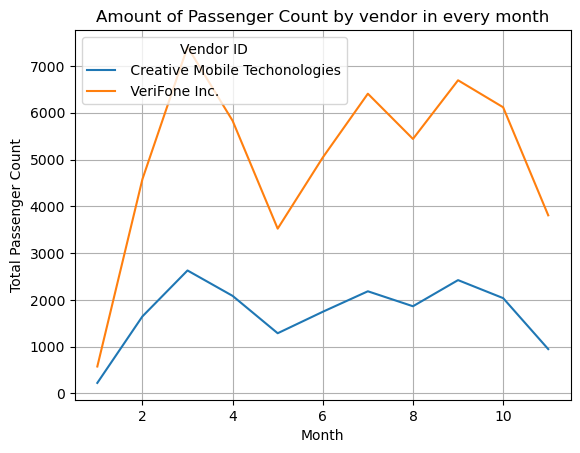

In [33]:
# Show Line chart for Passenger count by vendor in every month

for vendor_id in result['vendor_id'].unique():
    vendor_data = result[result['vendor_id'] == vendor_id]
    plt.plot(vendor_data['data_file_month'], vendor_data['passenger_count'], label=f' {vendor_id}')

plt.title('Amount of Passenger Count by vendor in every month')
plt.xlabel('Month')
plt.ylabel('Total Passenger Count')
plt.legend(title='Vendor ID')
plt.grid(True)
plt.show()

### Monthly Total Amount in each vendor

                        vendor_id  data_file_month  total_amount
0   Creative Mobile Techonologies                1       7585.78
1   Creative Mobile Techonologies                2      26035.07
2   Creative Mobile Techonologies                3      39973.70
3   Creative Mobile Techonologies                4      32877.38
4   Creative Mobile Techonologies                5      26922.59
5   Creative Mobile Techonologies                6      29993.38
6   Creative Mobile Techonologies                7      38189.42
7   Creative Mobile Techonologies                8      29695.05
8   Creative Mobile Techonologies                9      42758.11
9   Creative Mobile Techonologies               10      36996.43
10  Creative Mobile Techonologies               11      19922.64
11                  VeriFone Inc.                1      12531.79
12                  VeriFone Inc.                2      61285.47
13                  VeriFone Inc.                3      95813.09
14                  VeriF

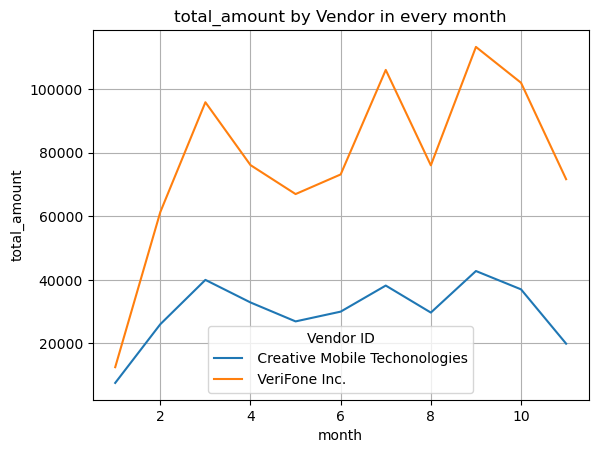

In [34]:
# vendor_id' & 'data_file_month aggregation
result = df.groupby(['vendor_id', 'data_file_month'])['total_amount'].sum().reset_index()

# show result
print(result)

for vendor_id in result['vendor_id'].unique():
    vendor_data = result[result['vendor_id'] == vendor_id]
    plt.plot(vendor_data['data_file_month'], vendor_data['total_amount'], label=f' {vendor_id}')

plt.title('total_amount by Vendor in every month')
plt.xlabel('month')
plt.ylabel('total_amount')
plt.legend(title='Vendor ID')
plt.grid(True)
plt.show()

### Daily Passenger Count

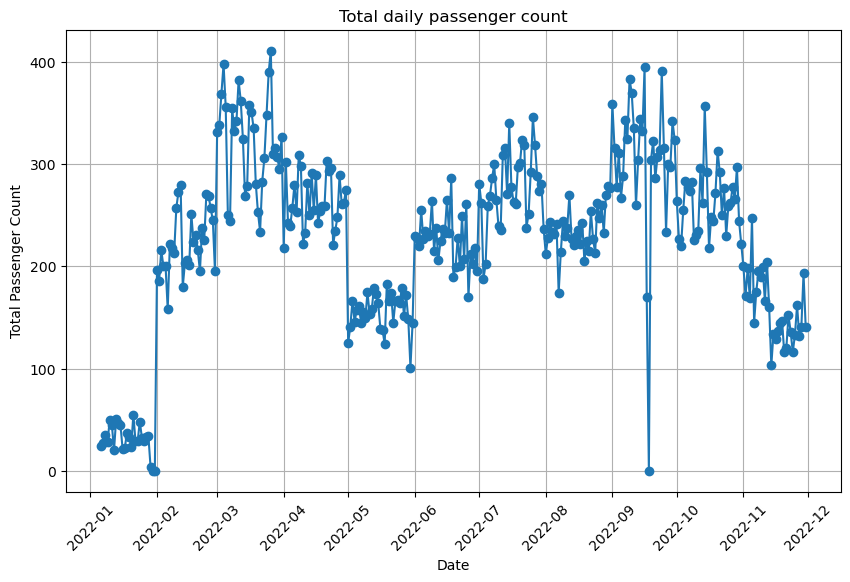

In [35]:
# count daily passenger
daily_passenger_count = df.resample('D', on='pickup_datetime')['passenger_count'].sum()

# make line chart with Matplotlib
plt.figure(figsize=(10, 6))
plt.plot(daily_passenger_count.index, daily_passenger_count.values, marker='o')
plt.title('Total daily passenger count')
plt.xlabel('Date')
plt.ylabel('Total Passenger Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### Daily Passenger Count in each vendor

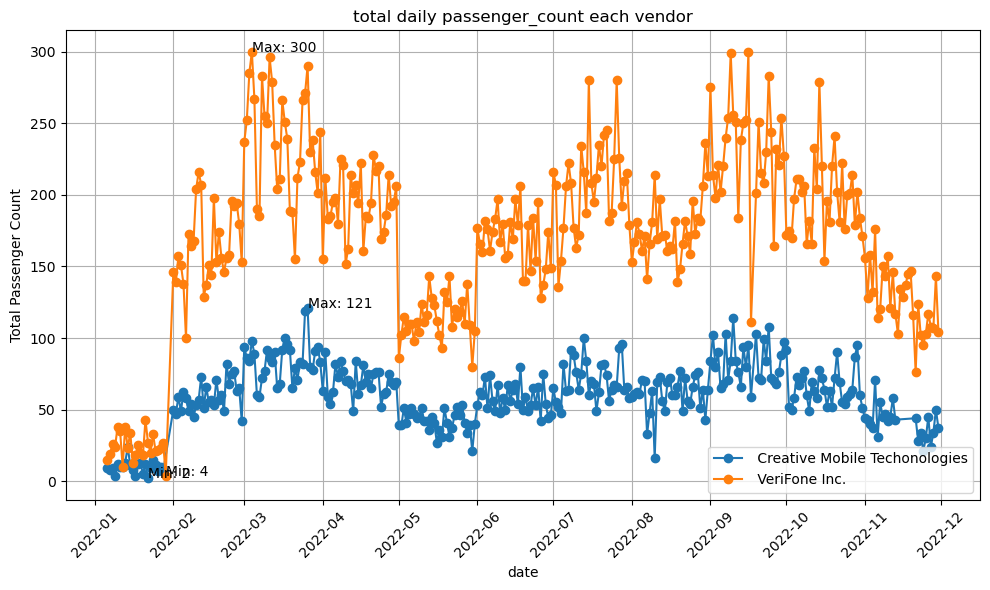

In [36]:
# calculate total daily passenger_count each vendor
daily_passenger_count = df.groupby(['vendor_id', df['pickup_datetime'].dt.date])['passenger_count'].sum().reset_index()

# result
# print(daily_passenger_count)

# make line chart using Matplotlib
plt.figure(figsize=(10, 6))

for vendor_id in daily_passenger_count['vendor_id'].unique():
    vendor_data = daily_passenger_count[daily_passenger_count['vendor_id'] == vendor_id]
    plt.plot(vendor_data['pickup_datetime'], vendor_data['passenger_count'], marker='o', label=f' {vendor_id}')
    
    # add min and max label
    max_idx = vendor_data['passenger_count'].idxmax()
    min_idx = vendor_data['passenger_count'].idxmin()
    plt.text(vendor_data.loc[max_idx, 'pickup_datetime'], vendor_data.loc[max_idx, 'passenger_count'], f'Max: {vendor_data.loc[max_idx, "passenger_count"]}')
    plt.text(vendor_data.loc[min_idx, 'pickup_datetime'], vendor_data.loc[min_idx, 'passenger_count'], f'Min: {vendor_data.loc[min_idx, "passenger_count"]}')

plt.title('total daily passenger_count each vendor')
plt.xlabel('date')
plt.ylabel('Total Passenger Count')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Hourly Pickup Passenger in each vendor

                        vendor_id  pickup_hour  passenger_count
0   Creative Mobile Techonologies            0              517
1   Creative Mobile Techonologies            1              330
2   Creative Mobile Techonologies            2              224
3   Creative Mobile Techonologies            3              133
4   Creative Mobile Techonologies            4               85
5   Creative Mobile Techonologies            5              113
6   Creative Mobile Techonologies            6              266
7   Creative Mobile Techonologies            7              517
8   Creative Mobile Techonologies            8              709
9   Creative Mobile Techonologies            9              757
10  Creative Mobile Techonologies           10              900
11  Creative Mobile Techonologies           11             1019
12  Creative Mobile Techonologies           12             1174
13  Creative Mobile Techonologies           13             1141
14  Creative Mobile Techonologies       

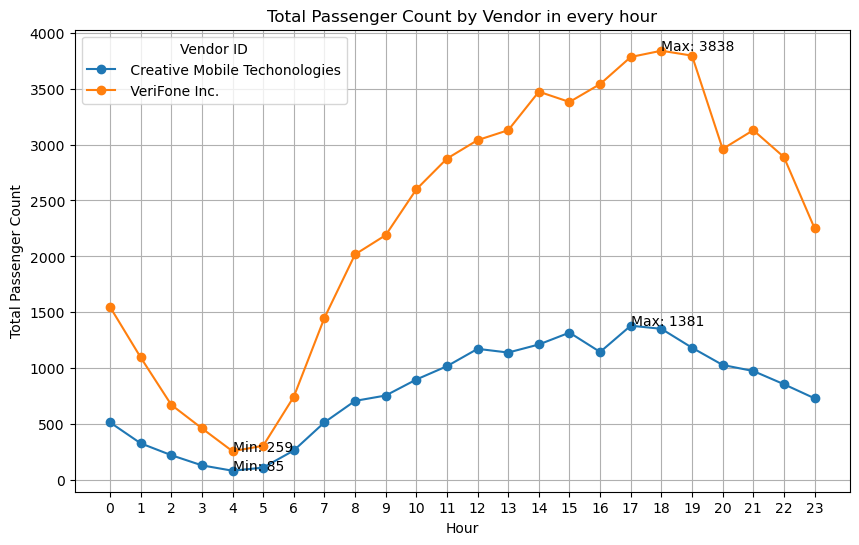

In [37]:
# get hour pickup_datetime
df['pickup_hour'] = df['pickup_datetime'].dt.hour

# calculate total passenger_count by vendor in every hour
hourly_passenger_count = df.groupby(['vendor_id', 'pickup_hour'])['passenger_count'].sum().reset_index()

# show result
print(hourly_passenger_count)

# make line chart using Matplotlib
plt.figure(figsize=(10, 6))

for vendor_id in hourly_passenger_count['vendor_id'].unique():
    vendor_data = hourly_passenger_count[hourly_passenger_count['vendor_id'] == vendor_id]
    plt.plot(vendor_data['pickup_hour'], vendor_data['passenger_count'], marker='o', label=f' {vendor_id}')
    
     # add min and max label
    max_idx = vendor_data['passenger_count'].idxmax()
    min_idx = vendor_data['passenger_count'].idxmin()
    plt.text(vendor_data.loc[max_idx, 'pickup_hour'], vendor_data.loc[max_idx, 'passenger_count'], f'Max: {vendor_data.loc[max_idx, "passenger_count"]}')
    plt.text(vendor_data.loc[min_idx, 'pickup_hour'], vendor_data.loc[min_idx, 'passenger_count'], f'Min: {vendor_data.loc[min_idx, "passenger_count"]}')

plt.title('Total Passenger Count by Vendor in every hour')
plt.xlabel('Hour')
plt.ylabel('Total Passenger Count')
plt.xticks(hourly_passenger_count['pickup_hour'].unique())
plt.legend(title='Vendor ID')
plt.grid(True)
plt.show()

### Day with most passenger

pickup_day
Sunday        9200
Monday        9452
Tuesday      10768
Wednesday    10856
Thursday     11440
Friday       11505
Saturday     11287
Name: passenger_count, dtype: int32


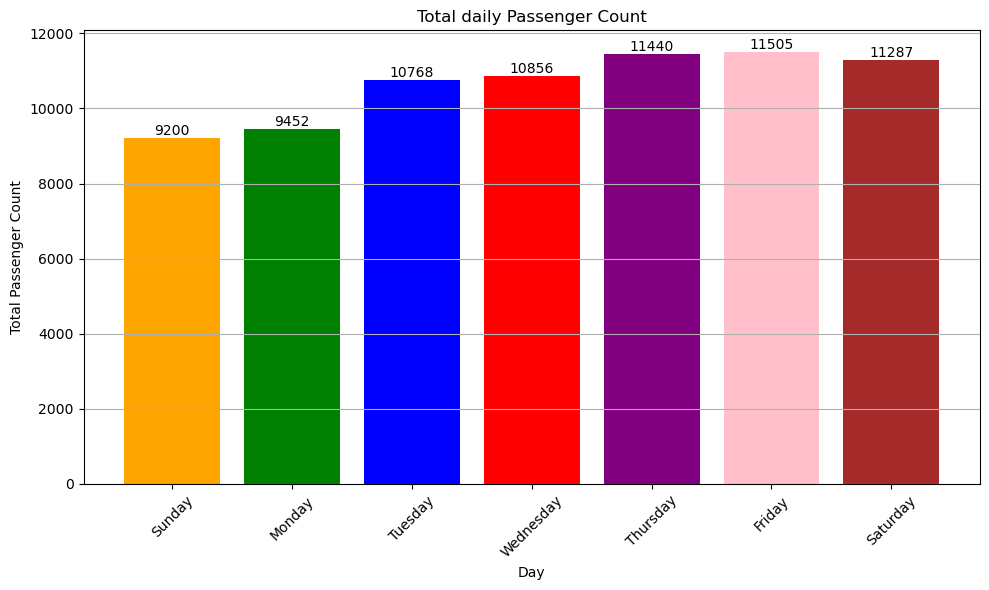

In [38]:
from pandas.api.types import CategoricalDtype

# get day name from pickup_datetime
df['pickup_day'] = df['pickup_datetime'].dt.day_name()

# make daily sort
cat_type = CategoricalDtype(categories=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'], ordered=True)
df['pickup_day'] = df['pickup_day'].astype(cat_type)

# calculate total passenger_count every day in a week
daily_passenger_count = df.groupby('pickup_day')['passenger_count'].sum()

# show result
print(daily_passenger_count)

# make bar chart
plt.figure(figsize=(10, 6))
days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
colors = ['orange', 'green', 'blue', 'red', 'purple', 'pink', 'brown']
plt.bar(days, daily_passenger_count, color=colors)
plt.title('Total daily Passenger Count')
plt.xlabel('Day')
plt.ylabel('Total Passenger Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()

# add label
for i, count in enumerate(daily_passenger_count):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=10, color='black')

plt.show()

### Day with most pickup

pickup_day
Sunday       6291
Monday       6817
Tuesday      7875
Wednesday    7994
Thursday     8237
Friday       8122
Saturday     7679
Name: pickup_datetime, dtype: int64


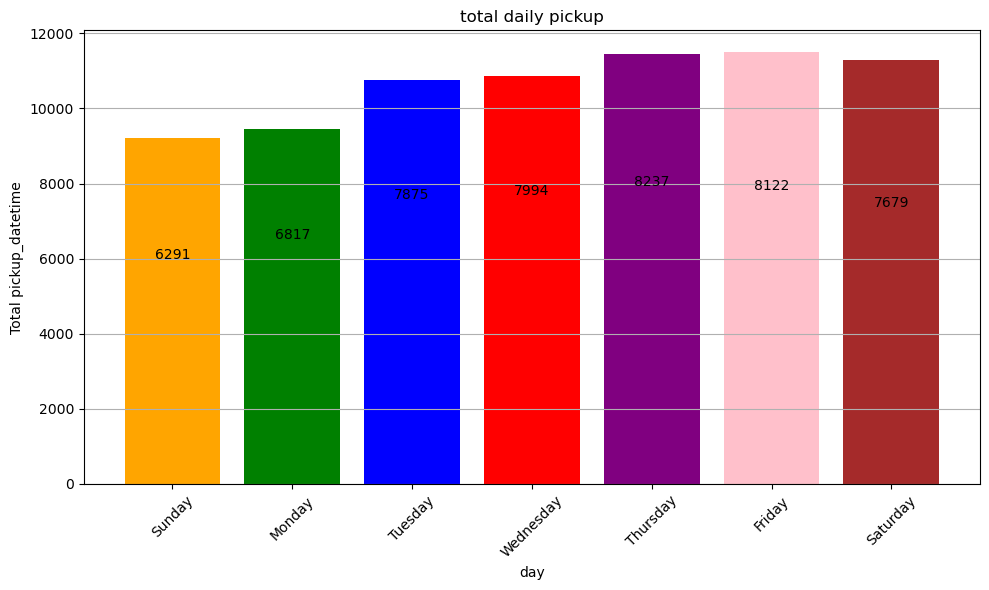

In [39]:
# calculate total pickup_datetime every day in a week
daily_pickup_count = df.groupby('pickup_day')['pickup_datetime'].count()

# show result
print(daily_pickup_count)

# make bar chart
plt.figure(figsize=(10, 6))
days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
colors = ['orange', 'green', 'blue', 'red', 'purple', 'pink', 'brown']
plt.bar(days, daily_passenger_count, color=colors)
plt.title('total daily pickup')
plt.xlabel('day')
plt.ylabel('Total pickup_datetime')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()

# add label
for i, count in enumerate(daily_pickup_count):
    plt.text(i, count, str(count), ha='center', va='top', fontsize=10, color='black')

plt.show()

### Tip Amount by Payment Type

In [40]:
# calculate total tips in each payment type
tip_by_payment = df.groupby('payment_type')['tip_amount'].sum()

# result
print(tip_by_payment)

payment_type
cash                9.66
credit card    147466.75
dispute             7.92
no charge          -0.01
Name: tip_amount, dtype: float64


### Total Amount by payment type

In [41]:
# calculate total amount in each payment type
amount_by_payment = df.groupby('payment_type')['total_amount'].sum()

# result
print(amount_by_payment)

payment_type
cash           211818.16
credit card    964278.23
dispute          5417.98
no charge        3901.06
Name: total_amount, dtype: float64


### Total Amount Percentage each vendor

vendor_id
Creative Mobile Techonologies    330949.55
VeriFone Inc.                    854465.88
Name: total_amount, dtype: float64


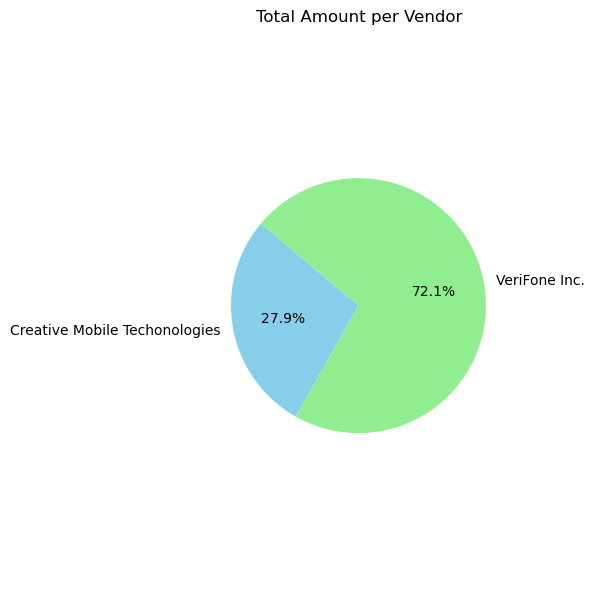

In [42]:
# calculate total amount by vendor
total_amount_by_vendor = df.groupby('vendor_id')['total_amount'].sum()

# result
print(total_amount_by_vendor)

# make pie chart
plt.figure(figsize=(6, 6))
plt.pie(total_amount_by_vendor, labels=total_amount_by_vendor.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen'])
plt.title('Total Amount per Vendor')
plt.axis('equal')
plt.tight_layout()
plt.show()

## Hourly Total Pickup 

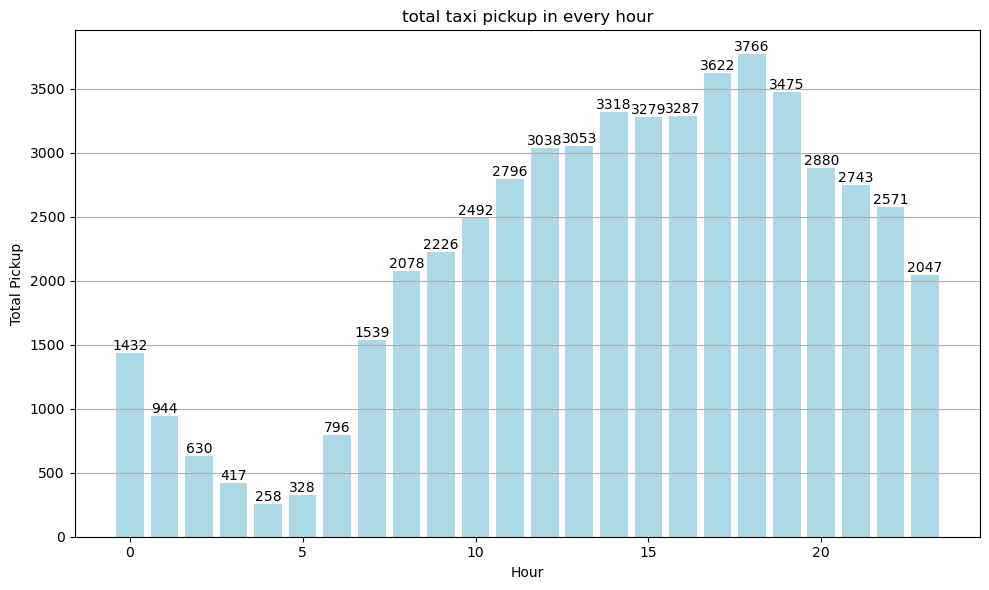

In [43]:
# calculate how many pickup in every hour
pickup_count_per_hour = df['pickup_hour'].value_counts().sort_index()

# make bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(pickup_count_per_hour.index, pickup_count_per_hour.values, color='lightblue')
plt.title('total taxi pickup in every hour')
plt.xlabel('Hour')
plt.ylabel('Total Pickup')
plt.xticks(rotation=0)

# add label 
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(int(bar.get_height())), ha='center', va='bottom')

plt.grid(axis='y')
plt.tight_layout()
plt.show()

## Hourly Total Pickup by Vendor

<Figure size 1000x600 with 0 Axes>

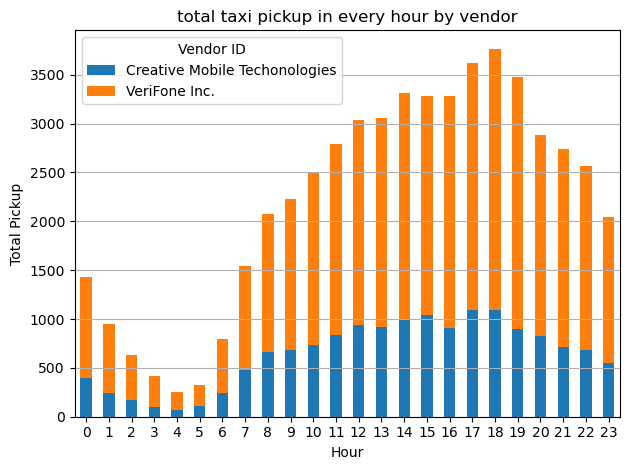

In [44]:
# calculate how many pickup in every hour by vendor
pickup_count_per_vendor_hour = df.groupby(['pickup_hour', 'vendor_id']).size().unstack()

# make stacked bar chart
plt.figure(figsize=(10, 6))
pickup_count_per_vendor_hour.plot(kind='bar', stacked=True)
plt.title('total taxi pickup in every hour by vendor')
plt.xlabel('Hour')
plt.ylabel('Total Pickup')
plt.xticks(rotation=0)
plt.legend(title='Vendor ID')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## which vendor generates a large amount of fare for every hour?

In [45]:
# get hour from pickup_datetime
df['pickup_hour'] = df['pickup_datetime'].dt.hour

# calculate total fare amount in every hour by vendor
result = df.groupby(['vendor_id', 'pickup_hour'])['fare_amount'].sum().reset_index()

# result
print(result)

                        vendor_id  pickup_hour  fare_amount
0   Creative Mobile Techonologies            0      5926.80
1   Creative Mobile Techonologies            1      3328.40
2   Creative Mobile Techonologies            2      2248.20
3   Creative Mobile Techonologies            3      1639.00
4   Creative Mobile Techonologies            4      1633.90
5   Creative Mobile Techonologies            5      2381.40
6   Creative Mobile Techonologies            6      4295.28
7   Creative Mobile Techonologies            7      7964.63
8   Creative Mobile Techonologies            8      9873.66
9   Creative Mobile Techonologies            9      9606.80
10  Creative Mobile Techonologies           10     10929.50
11  Creative Mobile Techonologies           11     11685.61
12  Creative Mobile Techonologies           12     13723.41
13  Creative Mobile Techonologies           13     14481.67
14  Creative Mobile Techonologies           14     15494.37
15  Creative Mobile Techonologies       

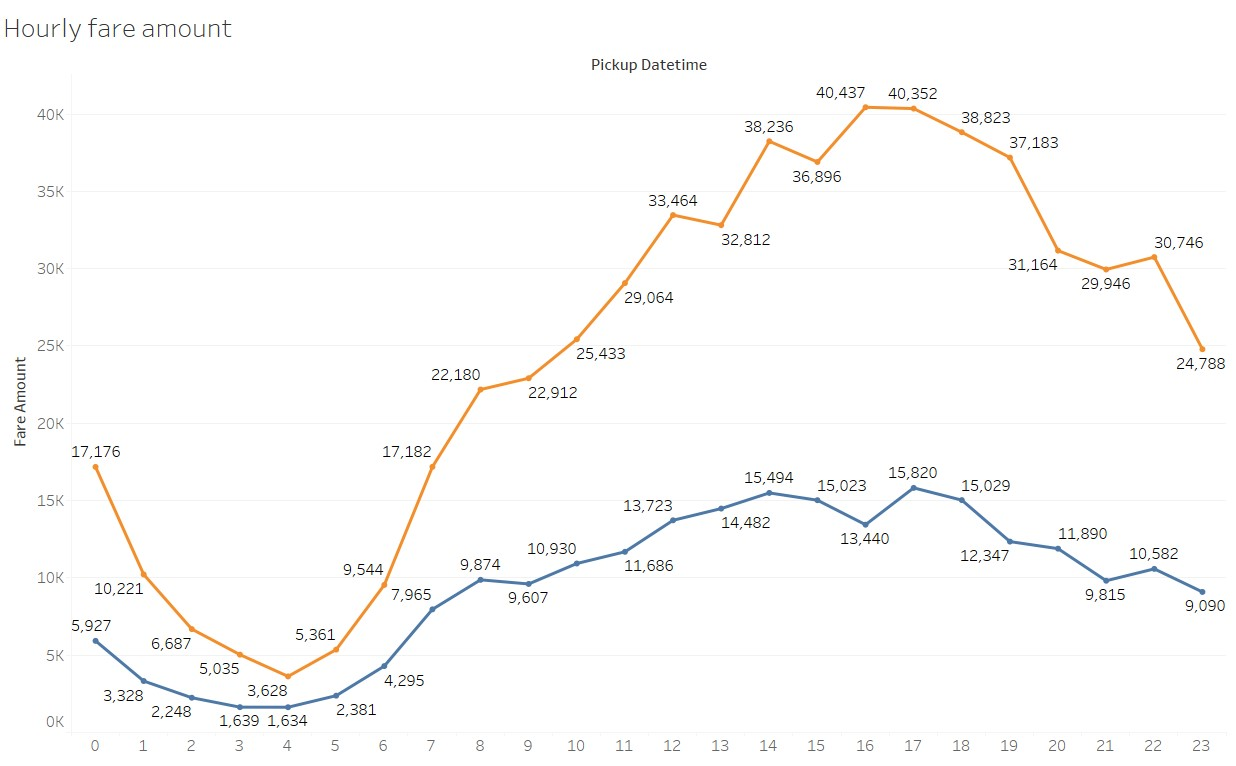

## At what time 'extra' for busy time is most often given?

In [46]:
# get hour from pickup_datetime
df['pickup_hour'] = df['pickup_datetime'].dt.hour

# calculate extra_frequency for 0.5 and 1 in every hour
extra_frequency = df[df['extra'].isin([0.5, 1])].groupby('pickup_hour')['extra'].count()

# result
print(extra_frequency)

pickup_hour
0     1003
1      683
2      451
3      305
4      165
5      175
6       18
8        1
11       4
12       3
13       3
14       4
15      38
16    1557
17    1771
18    1879
19    1843
20    1924
21    1945
22    1795
23    1444
Name: extra, dtype: int64


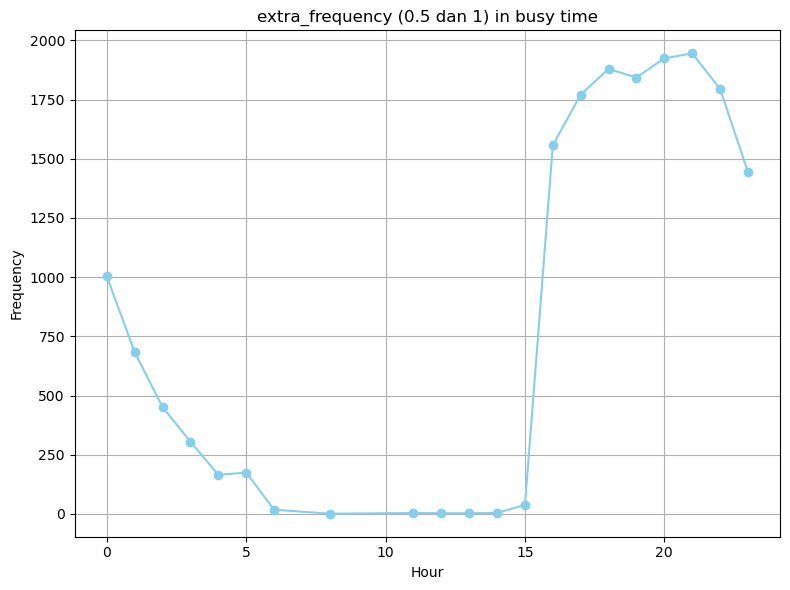

In [47]:
# Make line chart
plt.figure(figsize=(8, 6))
plt.plot(extra_frequency.index, extra_frequency.values, marker='o', color='skyblue')
plt.title('extra_frequency (0.5 dan 1) in busy time')
plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()

In [48]:
# get hour pickup_datetime
df['pickup_hour'] = df['pickup_datetime'].dt.hour

# calculate extra_frequency except 0, 0.5, and 1 in every hour
extra_frequency = df[~df['extra'].isin([0,0.5, 1])].groupby('pickup_hour')['extra'].count()

# result
print(extra_frequency)

pickup_hour
0      370
1      227
2      162
3       94
4       60
5       89
6      221
7      432
8      607
9      647
10     686
11     781
12     879
13     867
14     942
15     984
16     973
17    1131
18    1134
19     932
20     796
21     691
22     660
23     511
Name: extra, dtype: int64


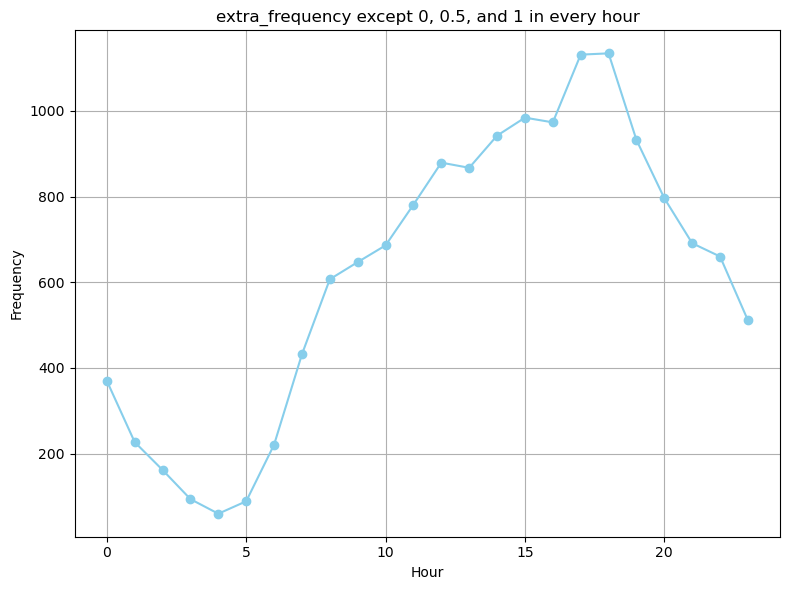

In [49]:
# make line chart
plt.figure(figsize=(8, 6))
plt.plot(extra_frequency.index, extra_frequency.values, marker='o', color='skyblue')
plt.title('extra_frequency except 0, 0.5, and 1 in every hour')
plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()

### what percentage of taxi will get extra and tip?

In [50]:
# calculate total data
total_data = len(df)

# calculate total data with extra > 0
count_extra = len(df[df['extra'] > 0])

# calculate total data with tip_amount > 0
count_tip = len(df[df['tip_amount'] > 0])

# calculate percentage to get extra and tip
percentage_extra = (count_extra / total_data) * 100
percentage_tip = (count_tip / total_data) * 100

# Result
print(f"Percentage get extra: {percentage_extra:.2f}%")
print(f"Percentage get tip: {percentage_tip:.2f}%")

Percentage get extra: 60.15%
Percentage get tip: 75.10%


## Percentage to get both of extra and tip

In [51]:
# calculate total data with extra > 0 dan tip_amount > 0
count_both = len(df[(df['extra'] > 0) & (df['tip_amount'] > 0)])

# calculate percentage to get both
percentage_both = (count_both / total_data) * 100

# result
print(f"percentage to get both extra and tip: {percentage_both:.2f}%")

percentage to get both extra and tip: 46.10%


### CONCLUSION

- March, July, September, and October are the 4 months with the highest passenger count, the most trips, and the largest total amount.
- In that month, it is better for vendors to provide more taxis to prepare in case of high demand. Apart from these 4 months, vendors can adjust the number of taxis based on existing insights for each month.

- From 4 a.m. to 6 p.m., there is an increase in demand for taxis. Therefore, vendors must provide sufficient taxis during these hours. And during these hours, there will also be an increase in the number of passengers; until 6 p.m., the number of taxis on standby can be adjusted.

- Passenger count, total pickup, and fare amount have the same pattern or trend every day. The increase occurred from 4 a.m. to 6 p.m., then decreased in the evening.

- The most preferred type of payment by passengers is using a credit card, with a resulting amount of 964,278.23, followed by cash, with a resulting amount of 211,818.16. Likewise, giving tips to drivers using a credit card with a total of 147,466 dollars

- Verifone Inc. generated 72.1%, or 854,465.88, of the total amount, while Creative Mobile Technologies only produced 330,949.55, or 27.9%, of the total amount. Verifone Inc. seems to have a larger number of taxis because of the number of trips, the fare amount, and the total amount generated, which is far more than Creative Mobile Technologies.

- The most frequent trips and the highest number of passengers are from Tuesday to Friday; from this insight, vendors can adjust the number of taxis available to be more than on weekends and Mondays.

- Giving extra peak hours (0.5 and 1) mostly on pickups from 4 p.m. to midnight, then the amount of extra giving decreases thereafter.

- Standard Rate is the highest rate code on the trip with 49,646, followed by JFK with 2408.

- JFK has a flat fare amount of 52 dollars.

- 75.1% chance that the driver will get tips from passengers and 60.15% chance that they will get extras for both rush hours, overnight fees, and other extras. and a 46.16% chance of getting both.

## Business Recommendations

1. **Adjustment of Number of Taxis by Month**: By knowing that certain months have higher demand and income, vendors can make adjustments to the number of taxis they provide in those months. This will help them optimize their service and ensure that they have enough taxis to meet demand.

2. **Optimization of Taxi during Rush Hour**: During peak hours between 4 a.m. and 6 p.m., there is an increase in demand and the number of passengers. Vendors can ensure that during these hours, they have sufficient taxis available on the street. This will help them earn more income.

3. **Promotion for Payment by Credit Card**: Considering that the majority of passengers prefer payment by credit card and also provide more tips by credit card, vendors can carry out promotions or incentives to encourage more passengers to use this payment method. This can increase tipping revenue and make transactions easier.

4. **Seasonal Promotions**: Based on the patterns found in the analysis, vendors can launch seasonal promotions during high-demand months, such as providing discounts in certain months such as March, July, September, and October.

5. **Daily Taxi Adjustment**: Considering certain days have higher demand, such as Tuesday to Friday, vendors may increase the number of taxis available during this period.

6. **Extras and Tips**: Given the large number of passengers giving extras and tips, vendors can provide training and incentives to drivers to provide better service and get the opportunity to earn more extras and tips.

7. **Extra Rush Hour Promo**: During peak hours, vendors can provide discounts or additional services for passengers who still choose taxis when extra peak hour rates apply.

8. **Weekend Promotions**: Vendors may run special promotions for weekends, such as discounts on Saturday and Sunday trips. This will encourage more passengers to use taxi services during weekends and holidays.

9. **Loyalty Programs**: Vendors may consider loyalty programs where customers who frequently use their taxi services earn points or special discounts. This will encourage customers to remain loyal to the taxi service.

### There are errors in this dataset, such as the features of the pickup date and, drop off date, and trip distance. It makes the insights obtained inappropriate, and decisions taken from these insights will be wrong and affect the actual conditions

## Total amount data does not match the time difference between pickup and drop off

In [52]:
# Displays 10 data with the most minute difference
top_10_longest_trips = df.nlargest(10, 'selisih_waktu_menit')

# Select the desired column
selected_columns = ['pickup_datetime', 'dropoff_datetime', 'trip_distance', 'fare_amount', 'total_amount','selisih_waktu_menit']
result = top_10_longest_trips[selected_columns]

# result
result.head(10)

,pickup_datetime,dropoff_datetime,trip_distance,fare_amount,total_amount,selisih_waktu_menit
21350,2022-01-25 07:50:00,2022-01-26 07:49:55,0.00,0.0,0.00,1439.916667
34634,2022-03-21 17:34:53,2022-03-22 17:33:52,0.85,5.5,12.25,1438.983333
23670,2022-02-11 10:45:11,2022-02-12 10:43:40,2.43,11.0,17.16,1438.483333
32377,2022-04-28 17:33:38,2022-04-29 17:31:58,2.46,14.5,18.80,1438.333333
45867,2022-06-23 19:20:54,2022-06-24 19:19:10,2.25,10.5,17.76,1438.266667
49446,2022-11-12 15:52:54,2022-11-13 15:50:03,1.70,10.5,15.18,1437.150000
31124,2022-10-29 18:25:17,2022-10-30 18:21:55,3.43,14.5,17.80,1436.633333
30550,2022-09-10 03:28:23,2022-09-11 03:24:47,2.87,12.0,15.80,1436.400000
20782,2022-10-18 13:28:26,2022-10-19 13:24:30,16.32,52.0,55.30,1436.066667
33774,2022-09-13 17:19:25,2022-09-14 17:14:52,5.02,26.0,30.30,1435.450000


From top 10 the biggest time differences in this table, spending 24 hours only for 1 trip, and also the trip distance and amount obtained is very little not in accordance with the time spent.

this proves that the driver did not set the taxi meter when dropping off passengers,

### What is the fare amount if the taxi does not set the pickup time and dropoff time correctly?

In [53]:
# get data with a condition
filtered_data = df[(df['selisih_waktu_menit'] > 200) & (df['fare_amount'] < 100)]

In [54]:
# show count of data
count_filtered_data = len(filtered_data)
print(f"Total data with minutes difference > 200 and fare amount < 100: {count_filtered_data}")

# show total fate amount they get
sum_fare_amount_filtered = filtered_data['fare_amount'].sum()
print(f"Total fare amount for data with a difference of minutes > 200 and fare amount < 100: {sum_fare_amount_filtered:.2f}")

Total data with minutes difference > 200 and fare amount < 100: 57
Total fare amount for data with a difference of minutes > 200 and fare amount < 100: 1105.40


57 times the driver didn't set the meter when dropping off passengers.

with a trip time of more than 200 minutes, the fare amount that should be obtained will be more than 1105 dollars

## See time difference based on trip distance and total amount

In [55]:
# Displays 10 data with the highest fare_amount
fare_amount = df.nlargest(10, 'fare_amount')

# Select the desired column
selected_columns = ['pickup_datetime', 'dropoff_datetime', 'trip_distance', 'fare_amount', 'total_amount','selisih_waktu_menit']
result = fare_amount[selected_columns]

# result
result.head(10)

,pickup_datetime,dropoff_datetime,trip_distance,fare_amount,total_amount,selisih_waktu_menit
30114,2022-07-22 07:01:20,2022-07-22 09:04:15,113.56,385.0,420.60,122.916667
41736,2022-04-08 00:47:44,2022-04-08 02:02:13,48.41,300.0,322.14,74.483333
53860,2022-03-25 14:22:36,2022-03-25 18:23:15,28.43,288.5,289.30,240.650000
42881,2022-06-21 22:58:10,2022-06-21 22:58:24,0.00,250.0,300.96,0.233333
34342,2022-08-25 20:23:34,2022-08-25 20:23:45,0.00,240.0,270.30,0.183333
14258,2022-01-23 08:14:26,2022-01-23 08:14:39,0.00,225.0,225.30,0.216667
6320,2022-07-20 20:14:52,2022-07-20 21:05:32,37.40,222.0,250.10,50.666667
11385,2022-09-10 14:14:08,2022-09-10 14:14:12,0.00,217.0,240.30,0.066667
29060,2022-07-28 07:27:37,2022-07-28 10:06:26,79.20,215.5,224.10,158.816667
30318,2022-02-25 12:07:38,2022-02-25 13:14:05,47.56,214.5,216.55,66.450000


From the table with the 10 highest fare amounts. With a large amount it will be directly proportional to the distance on a trip. In the table there are also 3 data with trip distance = 0. 

This proves that the sensor that records the taxi trip needs to be repaired to find out how far the trip is and what fare amount should be generated from the trip distance.

## which vendor makes a lot of mistakes not setting drop off time?

In [56]:
# Calculates the number of trips with difference minutes > 200
result = df[df['selisih_waktu_menit'] > 200].groupby('vendor_id').agg({'selisih_hari': 'count', 'selisih_waktu_menit': 'sum', 'total_amount':'sum'})

# result
print(result)

                               selisih_hari  selisih_waktu_menit  total_amount
vendor_id                                                                     
Creative Mobile Techonologies             1           556.933333         23.00
VeriFone Inc.                            58         75587.033333       1841.74


A trip with a time of more than 200 minutes only resulted in a total amount of 1841.74 dollars for Verifone Inc. Proving that this vendor needs to provide directions and return notifications to their drivers regarding pickup and drop-off times.

Vendor Creative Mobile Technologies makes fewer mistakes in this case.

In [57]:
# show data with difference minutes > 200 & total amount < 20
result = df[(df['selisih_waktu_menit'] > 200) & (df['total_amount'] <= 20)].groupby('vendor_id').agg({'selisih_hari': 'count', 'selisih_waktu_menit': 'sum'})

# result
print(result)

               selisih_hari  selisih_waktu_menit
vendor_id                                       
VeriFone Inc.            28         37445.766667


The difference of 28 days shows that there were 28 trips that took more than 200 minutes but only got a total of less than 20 dollars on each trip.

With this time span, drivers should pick up more passengers if they set the drop-off time correctly and can get a higher amount.

## how much data with trip distance = 0 and what is the total amount obtained in the trip?

In [58]:
# Calculates the total amount when the trip distance = 0
zero_distance_count = df[df['trip_distance'] == 0]['trip_distance'].count()
total_amount_when_zero_distance = df[df['trip_distance'] == 0]['total_amount'].sum()

# result
print(f"Total Trip Distance is 0: {zero_distance_count}")
print(f"Total Amount when Trip Distance is 0: {total_amount_when_zero_distance}")

Total Trip Distance is 0: 597
Total Amount when Trip Distance is 0: 26605.260000000002


There were 597 trips whose mileage was not recorded, but they received a total of 26605.26 dollars for zero trip distance.
In this case, the vendor cannot know how far the 597 trips have gone.

and make vendors unable to monitor the condition of their taxis so that they remain in good condition.

## how many trips with distance = 0 are not connected to the server (store and forward trip)?

In [59]:
# Calculates the number of trip_distance = 0 based on store_and_fwd_flag
zero_distance_by_flag = df.groupby('store_and_fwd_flag')['trip_distance'].apply(lambda x: (x == 0).sum())

# result
print(zero_distance_by_flag)

store_and_fwd_flag
N    581
Y     16
Name: trip_distance, dtype: int64


Most of these zero-trip distances do not have a connection to the server to keep records of their trips. There are only 16 trips connected to the server, even though the trip distance is 0.

## how many trips with a travel time of less than 1 minute?

In [60]:
# total data with time difference <= 1 minute
selisih_1 = df[df['selisih_waktu_menit'] <= 1].shape[0]

# result
print(f"Total data with time difference <= 1 minute: {selisih_1}")

Total data with time difference <= 1 minute: 566


There are 566 trips that only take less than 1 minute; this needs to be further investigated, whether the distance is close or the passengers cancel their trips.

## what is the total amount generated? and how much for each store_and_fwd_flag?

In [61]:
# Filtering operation based on time difference <= 1 minute
filtered_df = df[df['selisih_waktu_menit'] <= 1]

# Calculates the total amount total_amount
total_total_amount = filtered_df['total_amount'].sum()

# Calculates the total_amount for each store_and_fwd_flag
total_amount_by_flag = filtered_df.groupby('store_and_fwd_flag')['total_amount'].sum()

# result
print(f"Total Amount: {total_total_amount}")
print("The total_amount for each store_and_fwd_flag:")
print(total_amount_by_flag)

Total Amount: 26477.96
The total_amount for each store_and_fwd_flag:
store_and_fwd_flag
N    26334.90
Y      143.06
Name: total_amount, dtype: float64


With a trip that is less than 1 minute, the amount still comes in at as much as 26477.96 dollars, but most of the trips are still not connected to the server to record their travel records.

## what is the average fare amount generated and what is the average distance covered in less than 1 minute

In [62]:
# Filtering operation based on time difference <= 1 minute
filtered_df = df[df['selisih_waktu_menit'] <= 1]

# Calculate the average trip distance and fare amount
mean_trip_distance = filtered_df['trip_distance'].mean()
mean_fare_amount = filtered_df['fare_amount'].mean()

# result
print(f"average trip_distance: {mean_trip_distance}")
print(f"average fare_amount: {mean_fare_amount}")

average trip_distance: 0.36528268551236737
average fare_amount: 39.03441696113074


The average distance in less than 1 minute is 0.3 miles, with an average fare amount of 39.03 dollars.
a very large amount of fare for a trip that is less than 1 minute.

## Data with total amount = 0

In [63]:
# Count the number of records with total amount = 0
count_zero_total_amount = df[df['total_amount'] == 0].shape[0]

# Display the count
print("Number of records with total amount = 0:", count_zero_total_amount)

Number of records with total amount = 0: 14


On these 14 trips, passengers may cancel their taxi service

## Records data with trip distance = 0 and total amount = 0

In [64]:
# Filter the DataFrame for records with trip distance = 0 and total amount = 0
filtered_data = df[(df['trip_distance'] == 0) & (df['total_amount'] == 0)]

# Create a new DataFrame with selected columns
result_df = filtered_data[['trip_distance', 'total_amount', 'selisih_waktu_menit']]

# Display the result DataFrame
print(result_df)

       trip_distance  total_amount  selisih_waktu_menit
15215            0.0           0.0             0.300000
16180            0.0           0.0             2.683333
16672            0.0           0.0             0.000000
19034            0.0           0.0             0.166667
19707            0.0           0.0             0.066667
21350            0.0           0.0          1439.916667
22902            0.0           0.0             0.300000
23379            0.0           0.0             0.000000
34193            0.0           0.0          1432.283333
38423            0.0           0.0             0.066667
47399            0.0           0.0             0.250000
54029            0.0           0.0             0.600000


in this condition, some drivers immediately set a drop-off time when a passenger cancels a taxi service so that drivers can immediately look for other passengers. However, there are drivers who don't set the drop-off time for up to 24 hours, which makes two taxis actually available and can carry other passengers, but because they don't set the drop-off time, the taxis are still in a state of running the previous trip.

### Recommendation to avoid this mistake and error data

- Fix the sensor to detect the distance traveled on a trip to prevent zero trip distance.
- Connecting taxis that are not yet connected to the server so that they can keep driving records so that the data obtained will be more accurate and appropriate.
- Giving announcements and notices to drivers who often forget to set the drop-off time so that the time difference is not far away and drivers can look for other passengers.
- Provide notifications to drivers who travel for more than 5 hours, with the choice of whether they are still on a trip or have forgotten to set the drop-off time.
- refund passengers who do not end up using the taxi service if they cannot cancel the service and their money remains deducted from their credit card.

# Passenger Count Prediction

## Data Preparation

In [65]:
# Ignore warnings
import warnings

warnings.simplefilter(action = "ignore", category = FutureWarning)

# import the necessary Python libraries Numpy, Pandas and Matplotlib with their usual shorthand notation.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [66]:
df_train = pd.read_csv('train.csv')
df_train.head(10)

,pickup_datetime,passenger_count
0,2022-01-06 14:00:00+00:00,8.0
1,2022-01-06 15:00:00+00:00,3.0
2,2022-01-06 16:00:00+00:00,0.0
3,2022-01-06 17:00:00+00:00,0.0
4,2022-01-06 18:00:00+00:00,7.0
5,2022-01-06 19:00:00+00:00,1.0
6,2022-01-06 20:00:00+00:00,2.0
7,2022-01-06 21:00:00+00:00,1.0
8,2022-01-06 22:00:00+00:00,0.0
9,2022-01-06 23:00:00+00:00,2.0


In [67]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6306 entries, 0 to 6305
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pickup_datetime  6306 non-null   object 
 1   passenger_count  6306 non-null   float64
dtypes: float64(1), object(1)
memory usage: 98.7+ KB


## Data Preprocessing

### Missing Value Check

In [68]:
df_train.isnull().sum()

pickup_datetime    0
passenger_count    0
dtype: int64

### Duplicated Value Check

In [69]:
df_train.duplicated().sum()

0

### Convert Dtype from object to Datetime

In [70]:
# Convert and format pickup_datetime columns
df_train['pickup_datetime'] = pd.to_datetime(df_train['pickup_datetime']).dt.strftime('%Y-%m-%d %H:%M:%S')

In [71]:
# Convert strings back to datetime objects
df_train['pickup_datetime'] = pd.to_datetime(df_train['pickup_datetime'])

# Change to integer
df_train['passenger_count'] = df_train['passenger_count'].astype(int)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6306 entries, 0 to 6305
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pickup_datetime  6306 non-null   datetime64[ns]
 1   passenger_count  6306 non-null   int32         
dtypes: datetime64[ns](1), int32(1)
memory usage: 74.0 KB


## Stationary Test with Adfuller 

In [72]:
from statsmodels.tsa.stattools import adfuller
print("Observations of Dickey-fuller test")
dftest = adfuller(df_train['passenger_count'],autolag='AIC')
dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','#lags used','number of observations used'])
for key,value in dftest[4].items():
    dfoutput['critical value (%s)'%key]= value
print(dfoutput)

Observations of Dickey-fuller test
Test Statistic                   -5.234426
p-value                           0.000007
#lags used                       33.000000
number of observations used    6272.000000
critical value (1%)              -3.431393
critical value (5%)              -2.862001
critical value (10%)             -2.567015
dtype: float64


Based on the results of the Dickey-Fuller test given, the conclusion that can be drawn is that the p-value is 0.0.000007.
A small p-value (smaller than the specified significance level, for example 0.05) indicates that the null hypothesis can be rejected, so the data can be considered stationary.

## Feature Engineering

In [73]:
# Set 'order_date' as the index
df_train.set_index('pickup_datetime', inplace=True)

In [74]:
def create_features(df_train):
    """
    Create time series features based on time series index.
    """
    df_train = df_train.copy()
    df_train['hour'] = df_train.index.hour
    df_train['dayofweek'] = df_train.index.dayofweek
    df_train['quarter'] = df_train.index.quarter
    df_train['month'] = df_train.index.month
    df_train['year'] = df_train.index.year
    df_train['dayofyear'] = df_train.index.dayofyear
    df_train['dayofmonth'] = df_train.index.day
    df_train['weekofyear'] = df_train.index.isocalendar().week
   
    return df_train

df_train = create_features(df_train)

In [75]:
df_train.head(10)

,passenger_count,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
pickup_datetime,,,,,,,,,
2022-01-06 14:00:00,8,14,3,1,1,2022,6,6,1
2022-01-06 15:00:00,3,15,3,1,1,2022,6,6,1
2022-01-06 16:00:00,0,16,3,1,1,2022,6,6,1
2022-01-06 17:00:00,0,17,3,1,1,2022,6,6,1
2022-01-06 18:00:00,7,18,3,1,1,2022,6,6,1
2022-01-06 19:00:00,1,19,3,1,1,2022,6,6,1
2022-01-06 20:00:00,2,20,3,1,1,2022,6,6,1
2022-01-06 21:00:00,1,21,3,1,1,2022,6,6,1
2022-01-06 22:00:00,0,22,3,1,1,2022,6,6,1


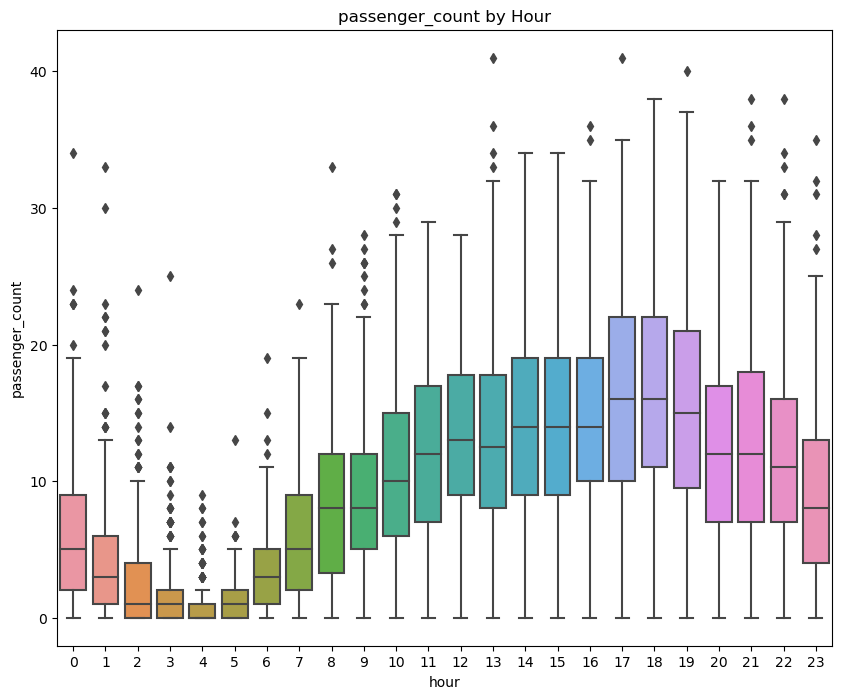

In [76]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df_train, x='hour', y='passenger_count')
ax.set_title('passenger_count by Hour')
plt.show()

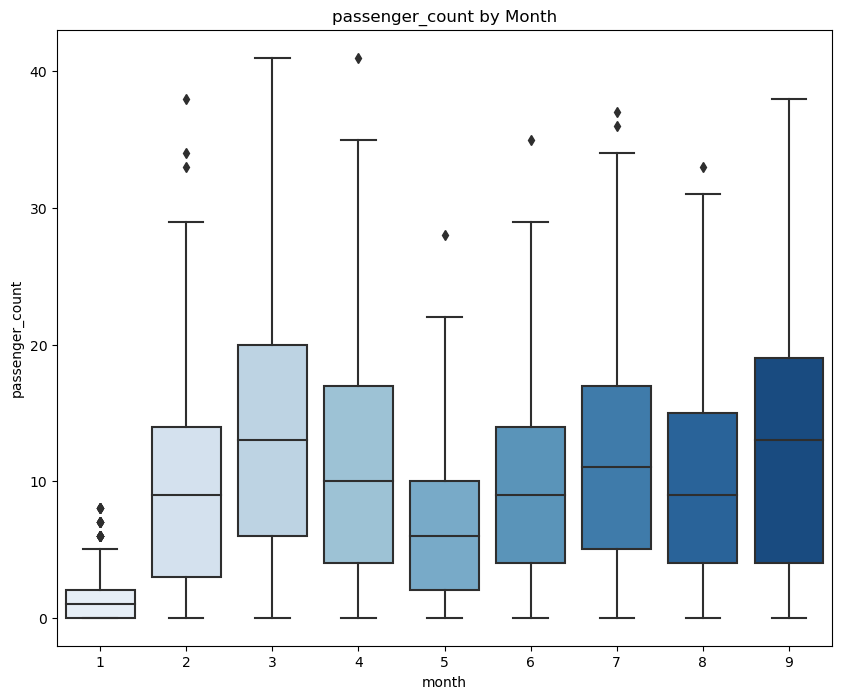

In [77]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df_train, x='month', y='passenger_count', palette='Blues')
ax.set_title('passenger_count by Month')
plt.show()

In [78]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6306 entries, 2022-01-06 14:00:00 to 2022-09-26 07:00:00
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   passenger_count  6306 non-null   int32 
 1   hour             6306 non-null   int64 
 2   dayofweek        6306 non-null   int64 
 3   quarter          6306 non-null   int64 
 4   month            6306 non-null   int64 
 5   year             6306 non-null   int64 
 6   dayofyear        6306 non-null   int64 
 7   dayofmonth       6306 non-null   int64 
 8   weekofyear       6306 non-null   UInt32
dtypes: UInt32(1), int32(1), int64(7)
memory usage: 449.5 KB


# Modelling Process

### Split into train & test

In [79]:
# Split the data into train and test sets
train, test = df_train[:4500], df_train[4500:]

In [80]:
train = create_features(train)
test = create_features(test)

FEATURES = ['dayofyear', 'hour', 'dayofweek', 'quarter', 'month', 'year']
TARGET = 'passenger_count'

X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

### Create Model with XGBoost

In [81]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

reg = xgb.XGBRegressor(base_score=0.1, booster='gbtree',    
                       n_estimators=1000,
                       early_stopping_rounds=100,
                       objective='reg:linear',
                       max_depth=4,
                       learning_rate=0.01)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

[18:45:35] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:11.57321	validation_1-rmse:13.79199
[100]	validation_0-rmse:6.23273	validation_1-rmse:8.27219
[200]	validation_0-rmse:4.89223	validation_1-rmse:6.68850
[300]	validation_0-rmse:4.54835	validation_1-rmse:6.01470
[400]	validation_0-rmse:4.42190	validation_1-rmse:5.75682
[500]	validation_0-rmse:4.35865	validation_1-rmse:5.67099
[592]	validation_0-rmse:4.32152	validation_1-rmse:5.69432


XGBRegressor(base_score=0.1, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=100,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', predictor=None, ...)

### Feature Importance

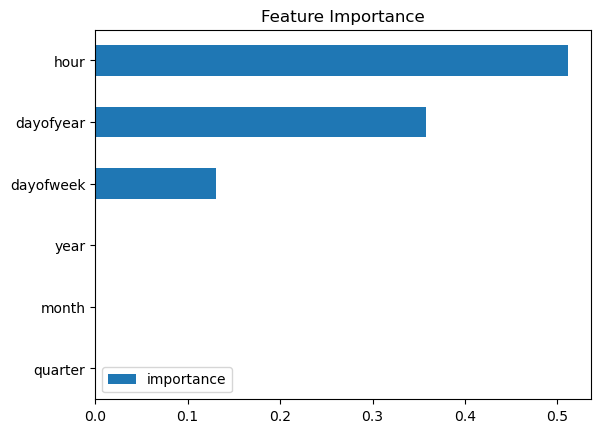

In [82]:
fi = pd.DataFrame(data=reg.feature_importances_,
             index=reg.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

In [83]:
# Make predictions
y_pred = reg.predict(X_test)

# Create a DataFrame to display actual and predicted data
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

results_df

,Actual,Predicted
pickup_datetime,,
2022-07-13 02:00:00,0,2.397166
2022-07-13 03:00:00,8,1.830170
2022-07-13 04:00:00,1,1.830170
2022-07-13 05:00:00,3,2.073825
2022-07-13 06:00:00,8,4.319648
...,...,...
2022-09-26 03:00:00,1,1.720365
2022-09-26 04:00:00,1,1.720365
2022-09-26 05:00:00,4,2.041545


### Forecast on Test

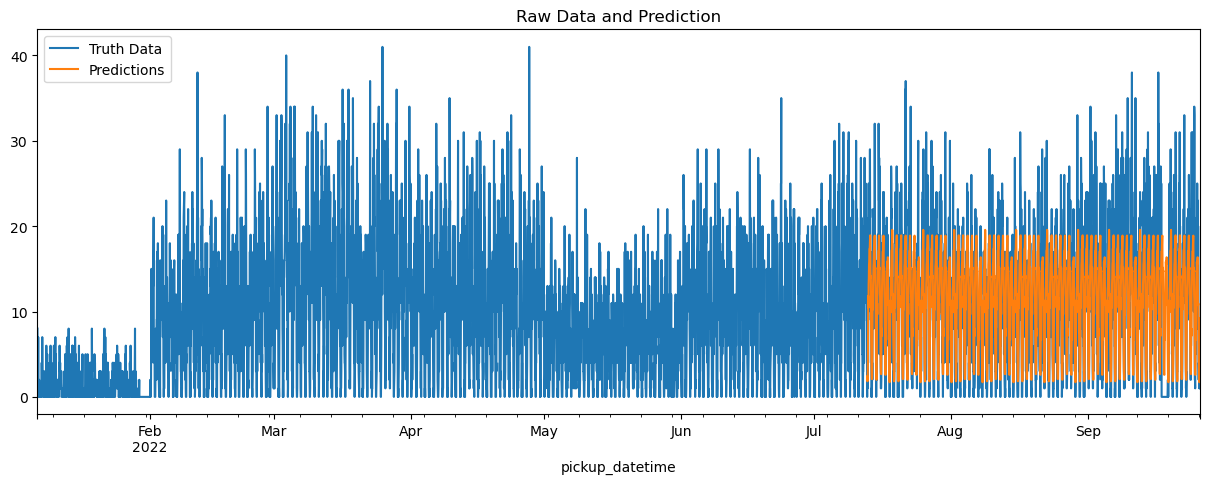

In [84]:
test['prediction'] = reg.predict(X_test)
df_train = df_train.merge(test[['prediction']], how='left', left_index=True, right_index=True)
ax = df_train[['passenger_count']].plot(figsize=(15, 5))
df_train['prediction'].plot(ax=ax)
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Data and Prediction')
plt.show()

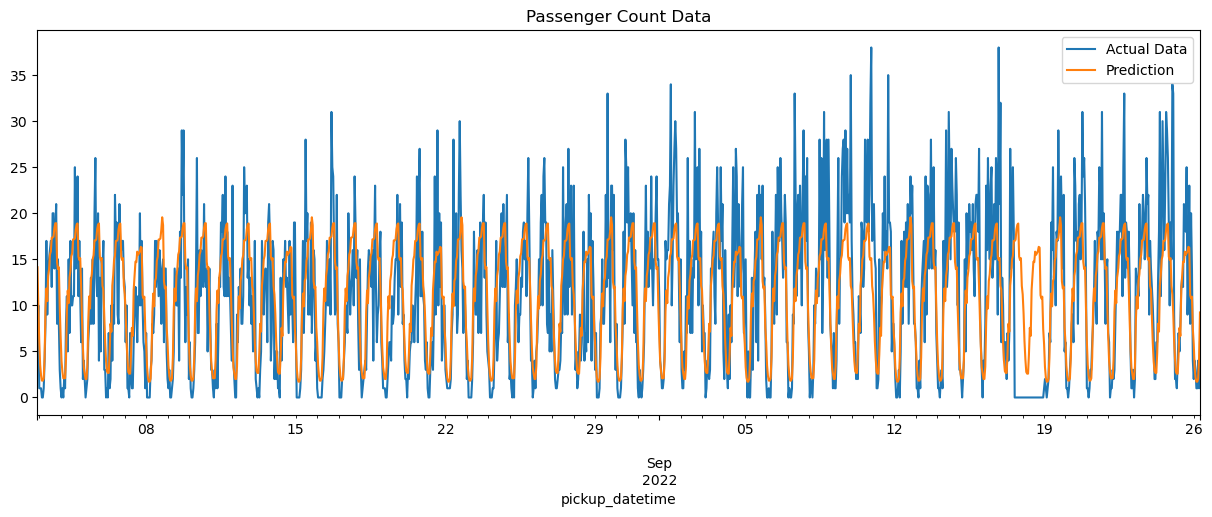

In [85]:
# Assuming you have df, ax, and predictions available
ax = df_train.iloc[5000:]['passenger_count'].plot(figsize=(15, 5), title='Passenger Count Data')
df_train.iloc[5000:]['prediction'].plot()
plt.legend(['Actual Data', 'Prediction'])
plt.show()

### Test Result

In [86]:
test.head(10)

,passenger_count,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,prediction
pickup_datetime,,,,,,,,,,
2022-07-13 02:00:00,0,2,2,3,7,2022,194,13,28,2.397166
2022-07-13 03:00:00,8,3,2,3,7,2022,194,13,28,1.830170
2022-07-13 04:00:00,1,4,2,3,7,2022,194,13,28,1.830170
2022-07-13 05:00:00,3,5,2,3,7,2022,194,13,28,2.073825
2022-07-13 06:00:00,8,6,2,3,7,2022,194,13,28,4.319648
2022-07-13 07:00:00,4,7,2,3,7,2022,194,13,28,9.577040
2022-07-13 08:00:00,13,8,2,3,7,2022,194,13,28,11.827177
2022-07-13 09:00:00,17,9,2,3,7,2022,194,13,28,10.459553
2022-07-13 10:00:00,25,10,2,3,7,2022,194,13,28,13.211211


### Metrics Score (RMSE)

In [87]:
score = np.sqrt(mean_squared_error(test['passenger_count'], test['prediction']))
print(f'RMSE Score on Test set: {score:0.2f}')

RMSE Score on Test set: 5.67


### Calculate Error

Look at the worst and best predicted days

In [88]:
test['error'] = np.abs(test[TARGET] - test['prediction'])
test['date'] = test.index.date
test.groupby(['date'])['error'].mean().sort_values(ascending=False).head(10)

date
2022-09-18    10.309033
2022-09-17     8.624825
2022-09-16     6.449263
2022-09-09     5.602822
2022-09-24     5.476693
2022-09-04     5.208845
2022-07-15     5.140071
2022-09-10     5.119788
2022-09-02     5.102725
2022-09-25     5.083455
Name: error, dtype: float64

# Predict New Data Test

In [89]:
df_test = pd.read_csv('test.csv')
df_test.head(10)

,index,pickup_datetime,passenger_count
0,0,2022-09-26 08:00:00+00:00,8.682343
1,1,2022-09-26 09:00:00+00:00,9.008879
2,2,2022-09-26 10:00:00+00:00,12.130991
3,3,2022-09-26 11:00:00+00:00,13.207260
4,4,2022-09-26 12:00:00+00:00,14.848100
5,5,2022-09-26 13:00:00+00:00,14.921511
6,6,2022-09-26 14:00:00+00:00,15.851296
7,7,2022-09-26 15:00:00+00:00,15.581733
8,8,2022-09-26 16:00:00+00:00,16.092270
9,9,2022-09-26 17:00:00+00:00,16.825766


### Preprocessing

In [90]:
# Convert and format pickup_datetime columns
df_test['pickup_datetime'] = pd.to_datetime(df_test['pickup_datetime']).dt.strftime('%Y-%m-%d %H:%M:%S')

# Convert strings back to datetime objects
df_test['pickup_datetime'] = pd.to_datetime(df_test['pickup_datetime'])

In [91]:
# Drop Index
df_test = df_test.drop('index', axis=1)

# Set 'order_date' as the index
df_test.set_index('pickup_datetime', inplace=True)

In [92]:
df_test

,passenger_count
pickup_datetime,
2022-09-26 08:00:00,8.682343
2022-09-26 09:00:00,9.008879
2022-09-26 10:00:00,12.130991
2022-09-26 11:00:00,13.207260
2022-09-26 12:00:00,14.848100
...,...
2022-11-30 19:00:00,17.366684
2022-11-30 20:00:00,14.421271
2022-11-30 21:00:00,14.537528


In [93]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1576 entries, 2022-09-26 08:00:00 to 2022-11-30 23:00:00
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   passenger_count  1576 non-null   float64
dtypes: float64(1)
memory usage: 24.6 KB


### Data test feature engineering

In [94]:
def create_features(df_test):
    """
    Create time series features based on time series index.
    """
    df_test = df_test.copy()
    df_test['hour'] = df_test.index.hour
    df_test['dayofweek'] = df_test.index.dayofweek
    df_test['quarter'] = df_test.index.quarter
    df_test['month'] = df_test.index.month
    df_test['year'] = df_test.index.year
    df_test['dayofyear'] = df_test.index.dayofyear
    df_test['dayofmonth'] = df_test.index.day
    df_test['weekofyear'] = df_test.index.isocalendar().week
   
    return df_test

df_test = create_features(df_test)

In [95]:
df_test

,passenger_count,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
pickup_datetime,,,,,,,,,
2022-09-26 08:00:00,8.682343,8,0,3,9,2022,269,26,39
2022-09-26 09:00:00,9.008879,9,0,3,9,2022,269,26,39
2022-09-26 10:00:00,12.130991,10,0,3,9,2022,269,26,39
2022-09-26 11:00:00,13.207260,11,0,3,9,2022,269,26,39
2022-09-26 12:00:00,14.848100,12,0,3,9,2022,269,26,39
...,...,...,...,...,...,...,...,...,...
2022-11-30 19:00:00,17.366684,19,2,4,11,2022,334,30,48
2022-11-30 20:00:00,14.421271,20,2,4,11,2022,334,30,48
2022-11-30 21:00:00,14.537528,21,2,4,11,2022,334,30,48


In [96]:
test = create_features(df_test)

FEATURES = ['dayofyear', 'hour', 'dayofweek', 'quarter', 'month', 'year']

new_X_test = test[FEATURES]

## Data Test Prediction Result

In [97]:
# Use the trained model to make predictions on the new data
new_predictions = reg.predict(new_X_test)

# Add the predicted passenger counts as a new column to the new_data DataFrame
df_test['passenger_count'] = new_predictions

# Print or save the DataFrame with predictions
print(df_test)

                     passenger_count  hour  dayofweek  quarter  month  year  \
pickup_datetime                                                               
2022-09-26 08:00:00        11.286833     8          0        3      9  2022   
2022-09-26 09:00:00         9.892872     9          0        3      9  2022   
2022-09-26 10:00:00        12.644528    10          0        3      9  2022   
2022-09-26 11:00:00        12.954988    11          0        3      9  2022   
2022-09-26 12:00:00        14.852554    12          0        3      9  2022   
...                              ...   ...        ...      ...    ...   ...   
2022-11-30 19:00:00        18.923325    19          2        4     11  2022   
2022-11-30 20:00:00        14.724527    20          2        4     11  2022   
2022-11-30 21:00:00        13.941226    21          2        4     11  2022   
2022-11-30 22:00:00        14.139457    22          2        4     11  2022   
2022-11-30 23:00:00         9.791636    23          

## Make new dataframe for data test to save

In [98]:
df_test_new = pd.read_csv('test.csv')
df_test_new.head(10)

,index,pickup_datetime,passenger_count
0,0,2022-09-26 08:00:00+00:00,8.682343
1,1,2022-09-26 09:00:00+00:00,9.008879
2,2,2022-09-26 10:00:00+00:00,12.130991
3,3,2022-09-26 11:00:00+00:00,13.207260
4,4,2022-09-26 12:00:00+00:00,14.848100
5,5,2022-09-26 13:00:00+00:00,14.921511
6,6,2022-09-26 14:00:00+00:00,15.851296
7,7,2022-09-26 15:00:00+00:00,15.581733
8,8,2022-09-26 16:00:00+00:00,16.092270
9,9,2022-09-26 17:00:00+00:00,16.825766


In [99]:
# Add the predicted passenger counts as a new column to the new_data DataFrame
df_test_new['passenger_count'] = new_predictions
df_test_new.head(10)

,index,pickup_datetime,passenger_count
0,0,2022-09-26 08:00:00+00:00,11.286833
1,1,2022-09-26 09:00:00+00:00,9.892872
2,2,2022-09-26 10:00:00+00:00,12.644528
3,3,2022-09-26 11:00:00+00:00,12.954988
4,4,2022-09-26 12:00:00+00:00,14.852554
5,5,2022-09-26 13:00:00+00:00,15.282354
6,6,2022-09-26 14:00:00+00:00,17.146595
7,7,2022-09-26 15:00:00+00:00,17.169163
8,8,2022-09-26 16:00:00+00:00,17.260153
9,9,2022-09-26 17:00:00+00:00,18.201462


In [100]:
df_test_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1576 entries, 0 to 1575
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            1576 non-null   int64  
 1   pickup_datetime  1576 non-null   object 
 2   passenger_count  1576 non-null   float32
dtypes: float32(1), int64(1), object(1)
memory usage: 30.9+ KB


In [101]:
df_test_new = df_test_new.drop('pickup_datetime', axis=1)
df_test_new.head(10)

,index,passenger_count
0,0,11.286833
1,1,9.892872
2,2,12.644528
3,3,12.954988
4,4,14.852554
5,5,15.282354
6,6,17.146595
7,7,17.169163
8,8,17.260153
9,9,18.201462


In [102]:
# # # Save the DataFrame to a CSV file
df_test_new.to_csv('pred.csv', index=False, header = 1)

## Daily total passenger

In [103]:
# Create a DataFrame with index and Passenger_Count_Prediction
prediction_df = pd.DataFrame({'pickup_datetime': df_test.index, 'Passenger_Count_Prediction': new_predictions})
prediction_df.head(10)

,pickup_datetime,Passenger_Count_Prediction
0,2022-09-26 08:00:00,11.286833
1,2022-09-26 09:00:00,9.892872
2,2022-09-26 10:00:00,12.644528
3,2022-09-26 11:00:00,12.954988
4,2022-09-26 12:00:00,14.852554
5,2022-09-26 13:00:00,15.282354
6,2022-09-26 14:00:00,17.146595
7,2022-09-26 15:00:00,17.169163
8,2022-09-26 16:00:00,17.260153
9,2022-09-26 17:00:00,18.201462


In [104]:
# Menghitung jumlah penumpang berdasarkan tanggal
passenger_count_by_date = prediction_df.groupby(prediction_df['pickup_datetime'].dt.date)['Passenger_Count_Prediction'].sum()

# Menampilkan hasil
passenger_count_by_date.head(10)

pickup_datetime
2022-09-26    229.105301
2022-09-27    273.311157
2022-09-28    273.465240
2022-09-29    277.627808
2022-09-30    277.269196
2022-10-01    278.988770
2022-10-02    247.416794
2022-10-03    259.378143
2022-10-04    273.311157
2022-10-05    273.465240
Name: Passenger_Count_Prediction, dtype: float32

In [105]:
# Membuat DataFrame baru
result_df = pd.DataFrame({
    'Date': passenger_count_by_date.index,
    'Total_Passenger_Count': passenger_count_by_date.values
})

# Menampilkan hasil
print(result_df)

          Date  Total_Passenger_Count
0   2022-09-26             229.105301
1   2022-09-27             273.311157
2   2022-09-28             273.465240
3   2022-09-29             277.627808
4   2022-09-30             277.269196
..         ...                    ...
61  2022-11-26             278.988770
62  2022-11-27             247.416794
63  2022-11-28             259.378143
64  2022-11-29             273.311157
65  2022-11-30             273.465240

[66 rows x 2 columns]


In [106]:
# # # Save the DataFrame to a CSV file
# result_df.to_csv('pred.csv', index=False)

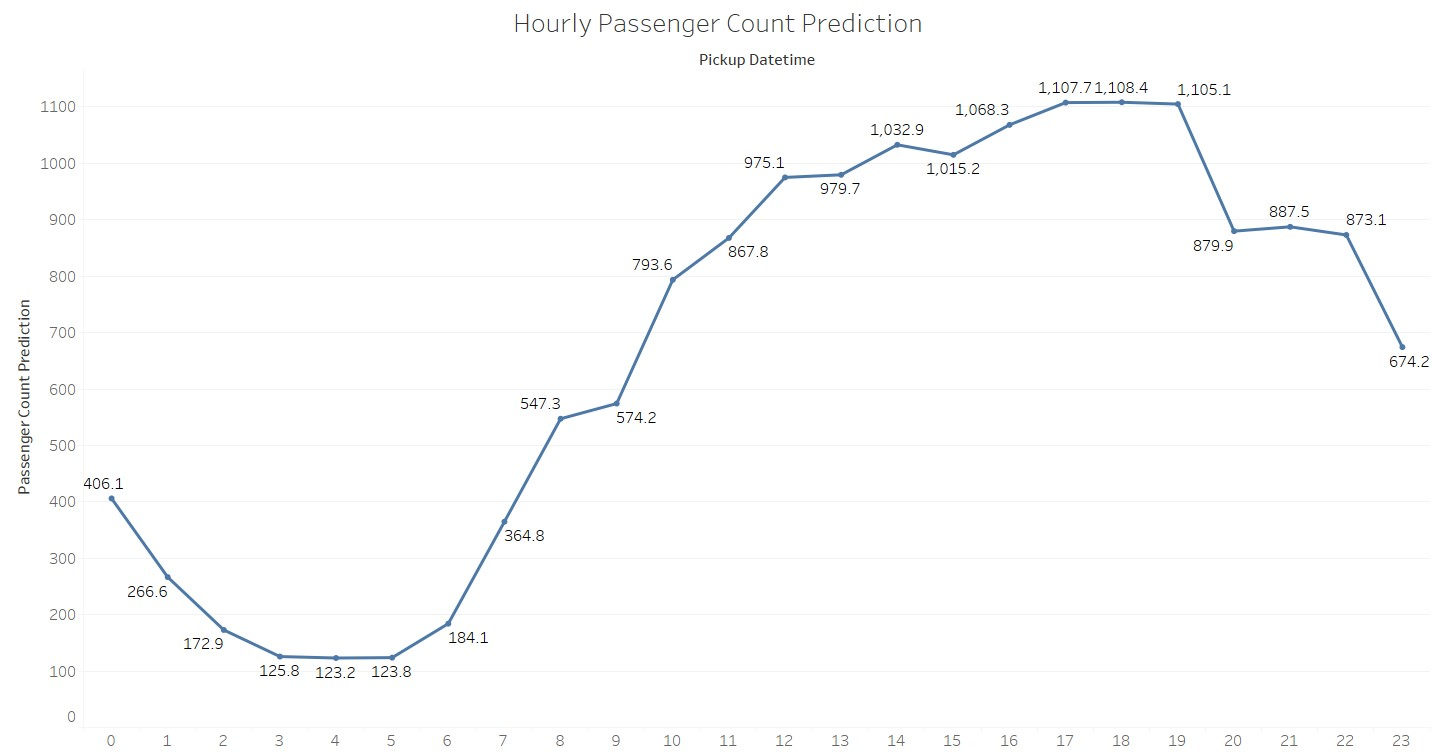

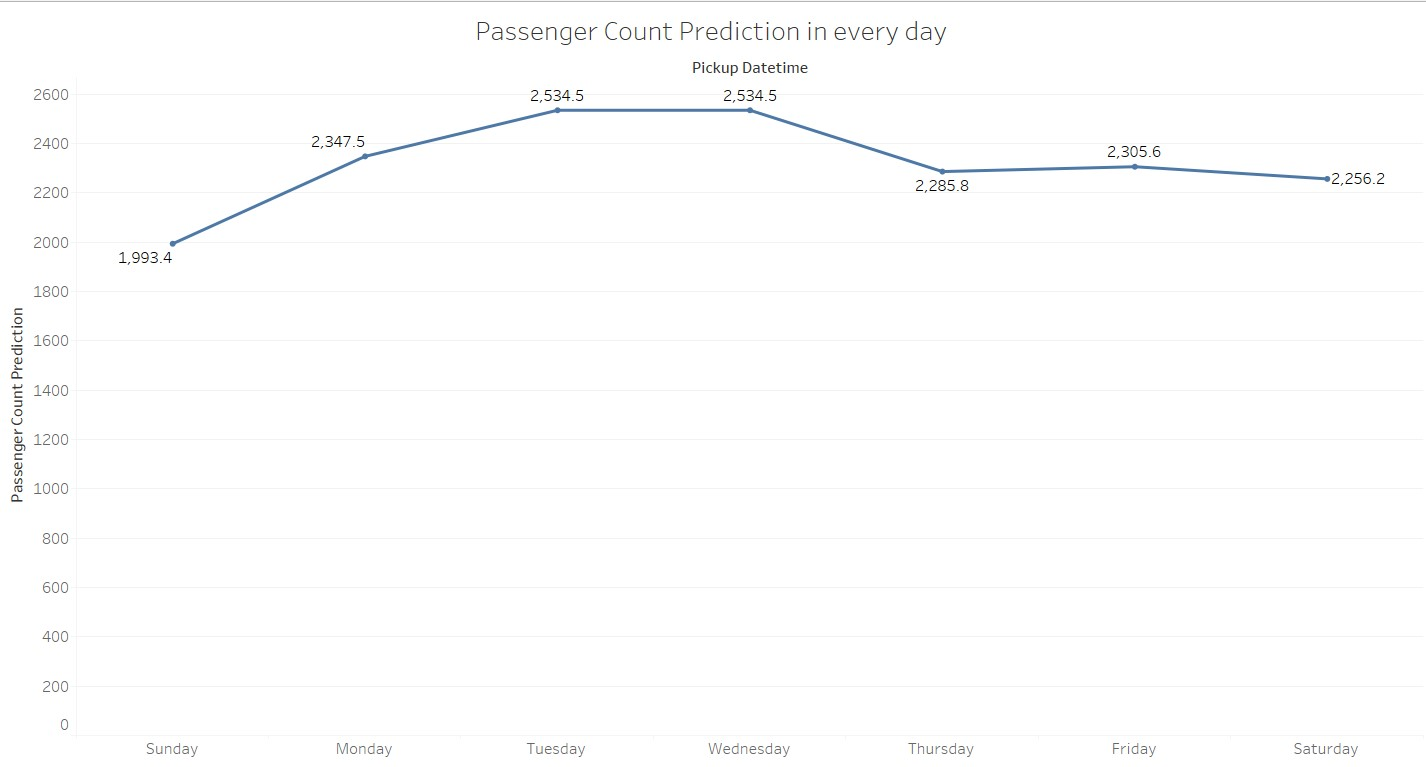

## save dataframe to csv

In [107]:
# # # Save the DataFrame to a CSV file
# prediction_df.to_csv('test_predictions.csv', index=False)

## Recommendation



- Given the consistent increase in the number of passengers over the 65-day period, it is advisable for taxi service providers to ensure sufficient vehicle availability to accommodate the increased demand. This will help avoid situations where passengers have to wait a long time or have trouble getting a taxi.


- it is important for taxi companies to have an efficient and coordinated operational system. Good coordination will help ensure smooth operations during periods of spikes in demand.

After doing passenger forecasting and calculating the current capacity based on the number of cars owned and their ability to serve demand every hour, Then compare the results of the predicted demand for taxis with the capacity of the taxis owned. If demand consistently exceeds current capacity at certain hours, this can be taken as an indicator that capacity caps will be reached at those times.